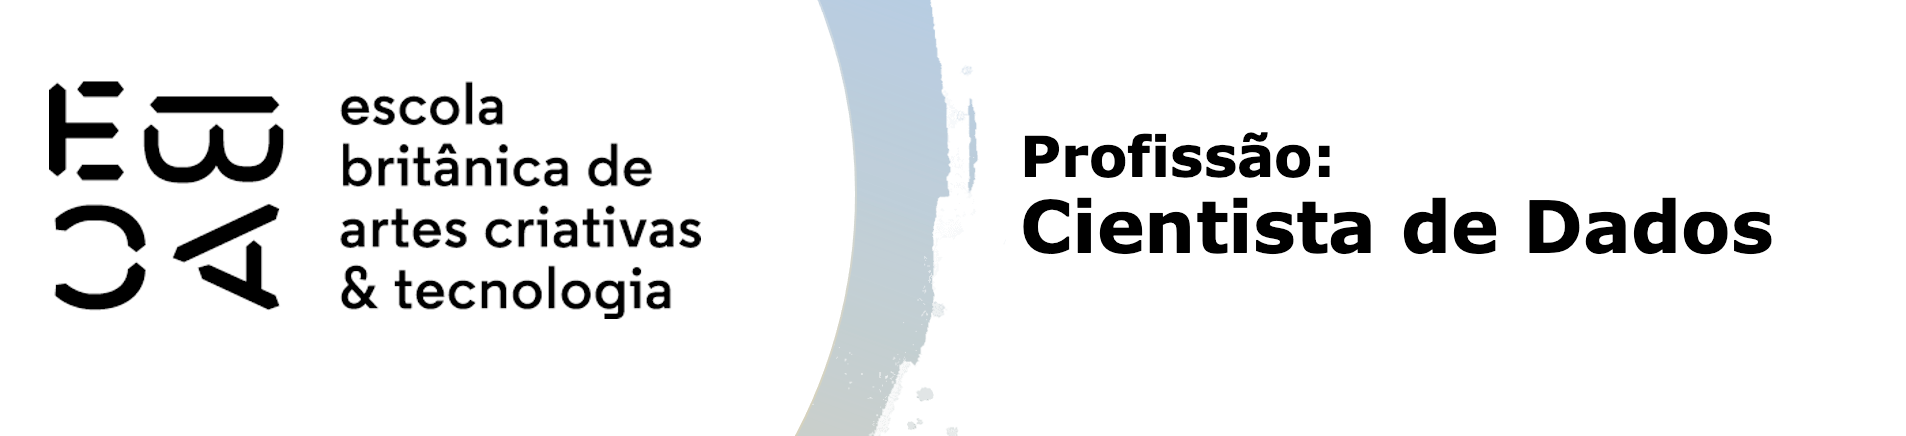

# Projeto Final

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Define o tema "darkgrid"
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [3]:
# Transformar a variável resposta em inteiro
df['mau'] = df.mau.astype('int64')
#drop da coluna index
df.drop('index', axis=1, inplace=True)

# Verificando a data máxima
df['data_ref'] = df['data_ref'].dt.to_period('M')
df['data_ref'].max()

Period('2016-03', 'M')

In [4]:
#Separando os tres ultimos meses para validação/teste out of time
df_train = df[df['data_ref'] < '2016-01']
df_test = df[df['data_ref'] >= '2016-01']

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

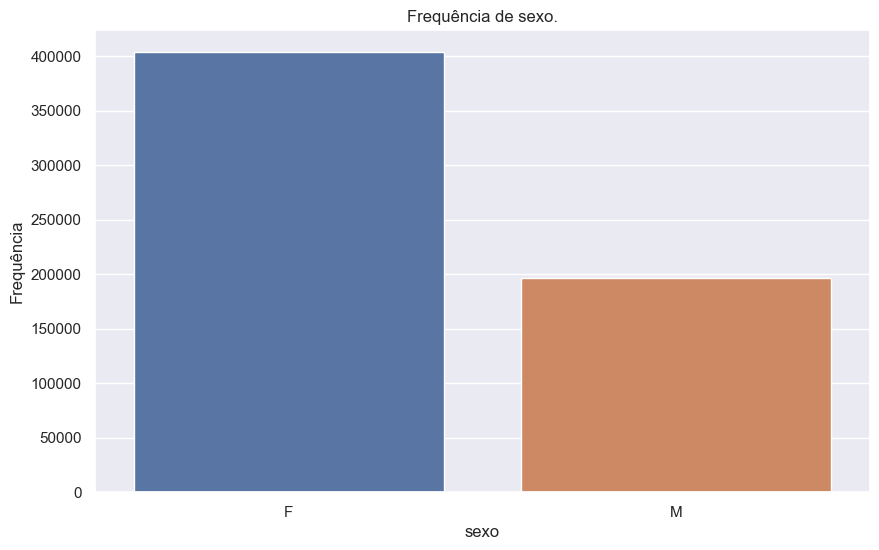

In [5]:
# Descritiva da variável sexo.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='sexo')
plt.title('Frequência de sexo.')
plt.ylabel('Frequência')
plt.show()

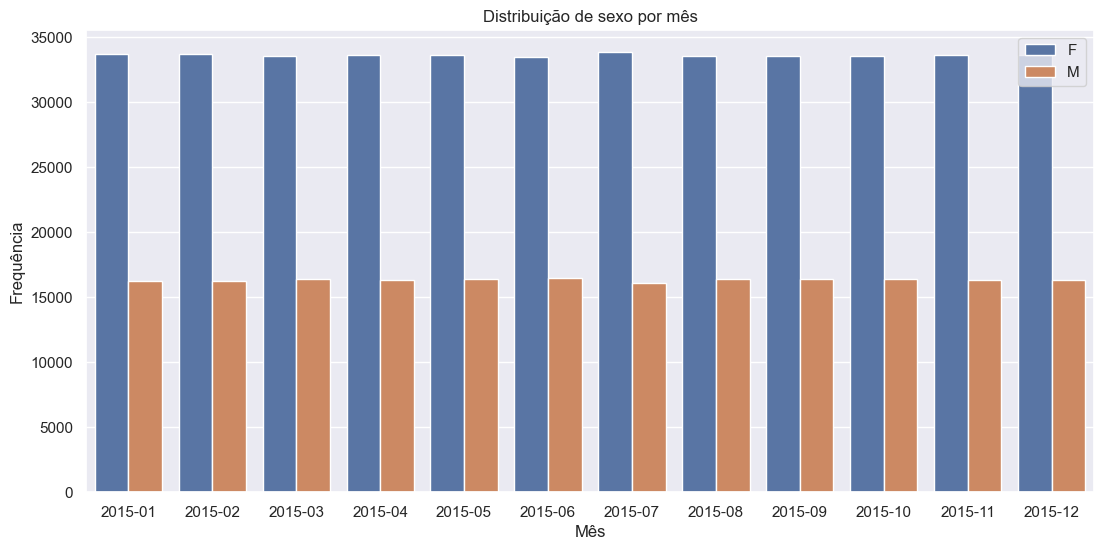

In [8]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='sexo')
plt.legend(loc='best')
plt.title('Distribuição de sexo por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')

plt.show()

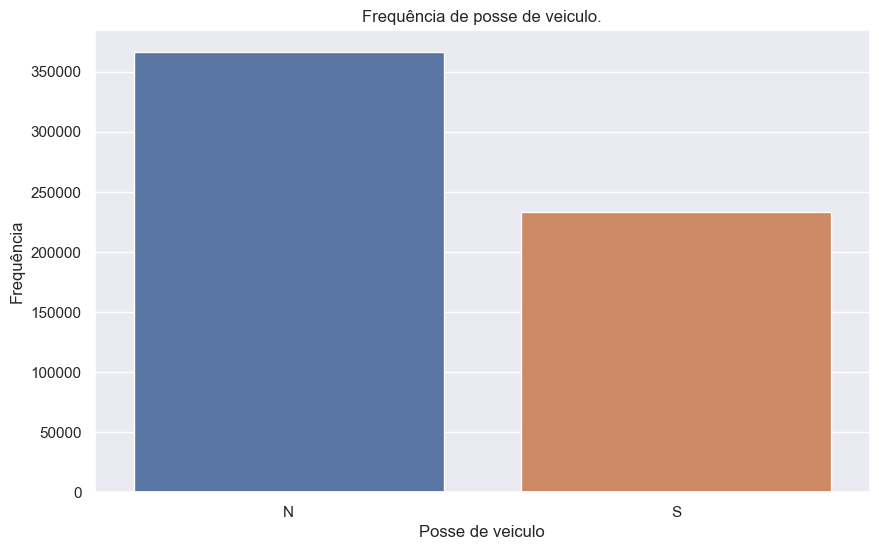

In [9]:
# Descritiva da variável posse_de_veiculo.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='posse_de_veiculo')
plt.title('Frequência de posse de veiculo.')
plt.ylabel('Frequência')
plt.xlabel('Posse de veiculo')
plt.show()

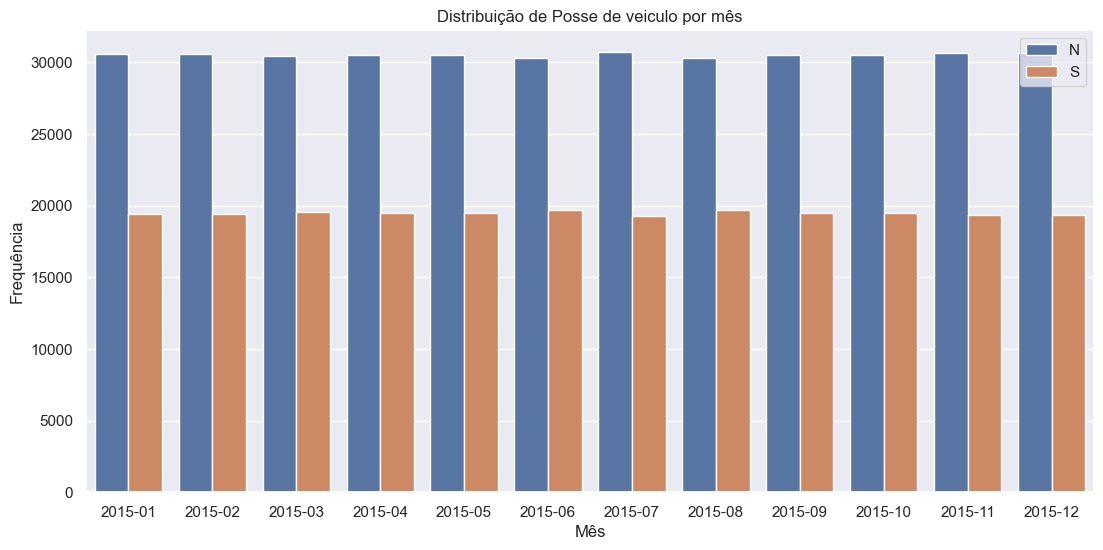

In [10]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='posse_de_veiculo')
plt.legend(loc='best')
plt.title('Distribuição de Posse de veiculo por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')

plt.show()

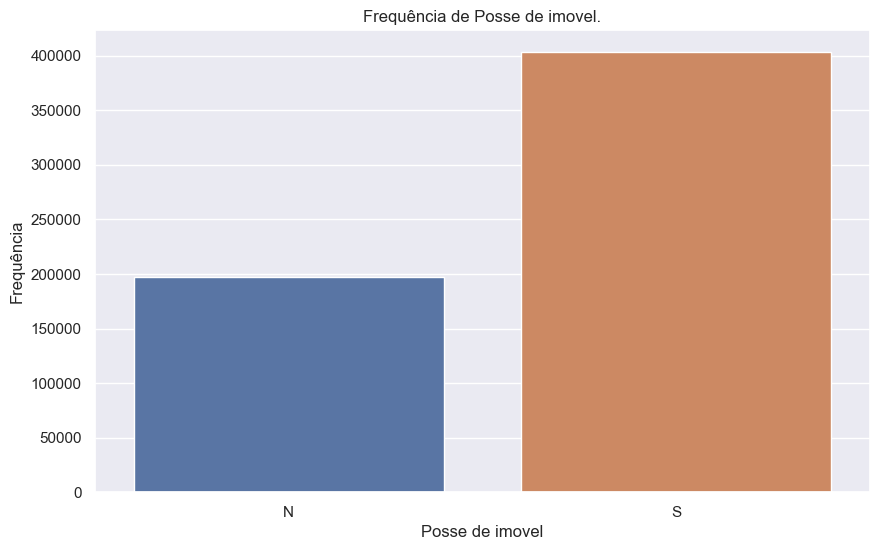

In [11]:
# Descritiva da variável posse_de_imovel.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='posse_de_imovel')
plt.title('Frequência de Posse de imovel.')
plt.ylabel('Frequência')
plt.xlabel('Posse de imovel')
plt.show()

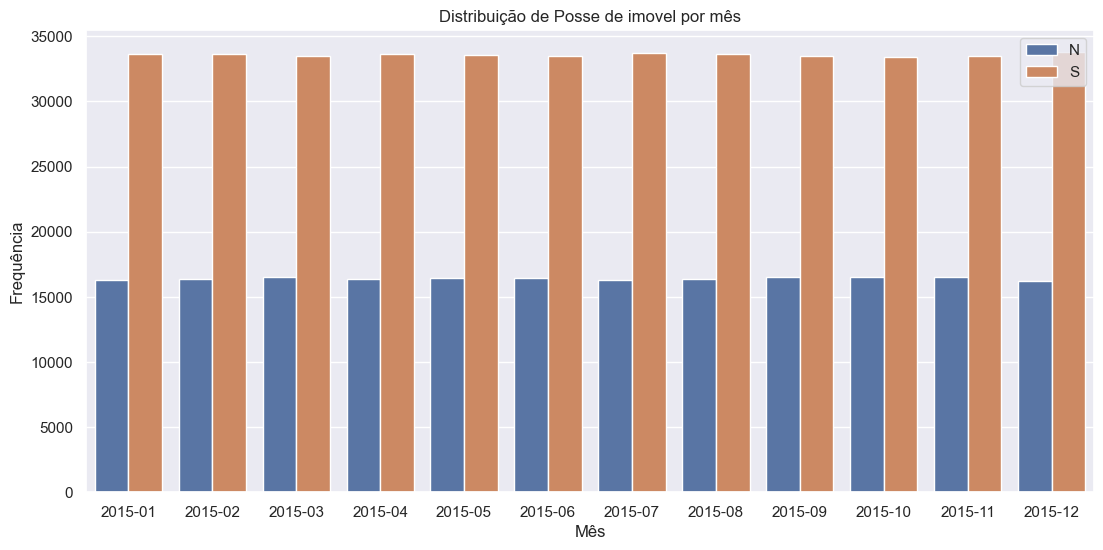

In [12]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='posse_de_imovel')
plt.legend(loc='best')
plt.title('Distribuição de Posse de imovel por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')

plt.show()

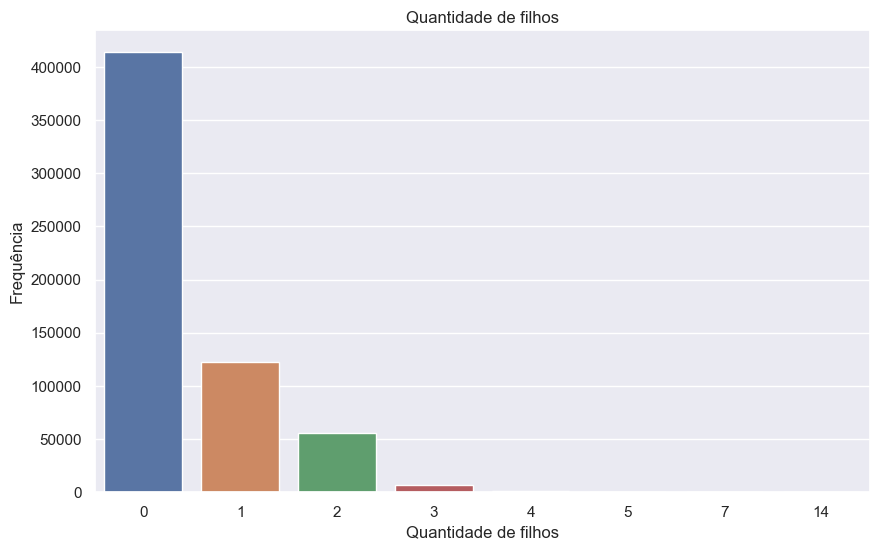

In [13]:
# Descritiva da variável qtd_filhos.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='qtd_filhos')
plt.title('Quantidade de filhos')
plt.ylabel('Frequência')
plt.xlabel('Quantidade de filhos')
plt.show()

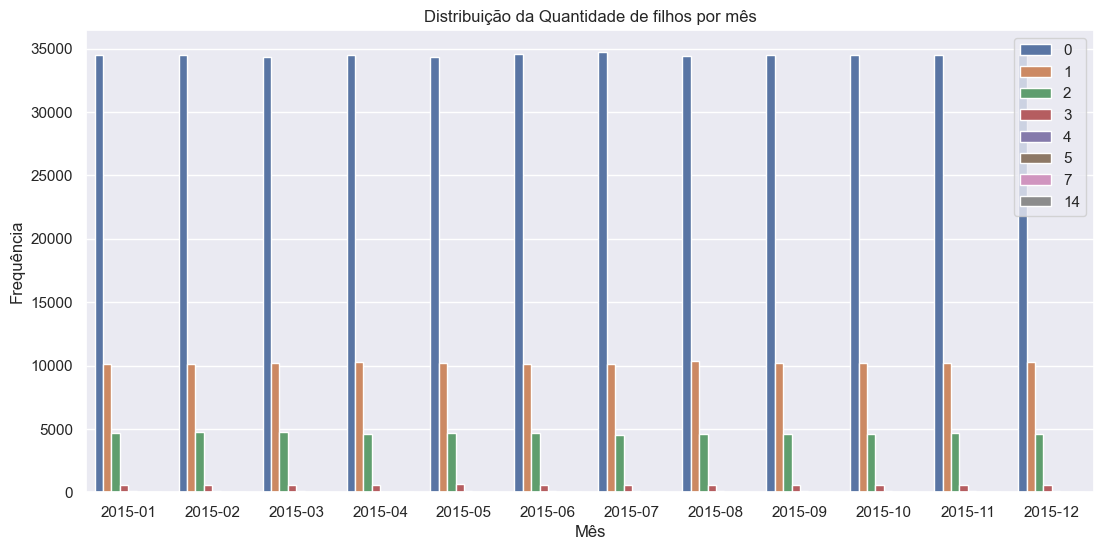

In [14]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='qtd_filhos')
plt.legend(loc='best')
plt.title('Distribuição da Quantidade de filhos por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')

plt.show()

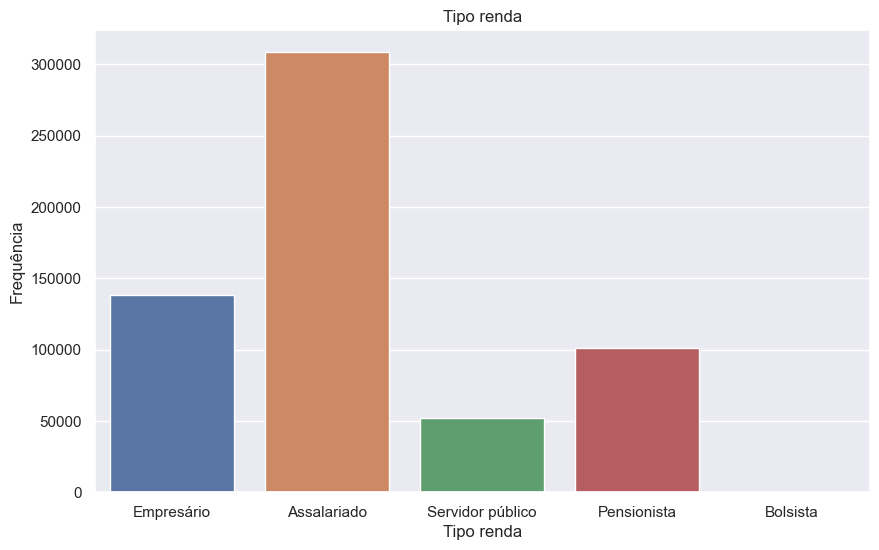

In [15]:
# Descritiva da variável tipo_renda.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='tipo_renda')
plt.title('Tipo renda')
plt.ylabel('Frequência')
plt.xlabel('Tipo renda')
plt.show()

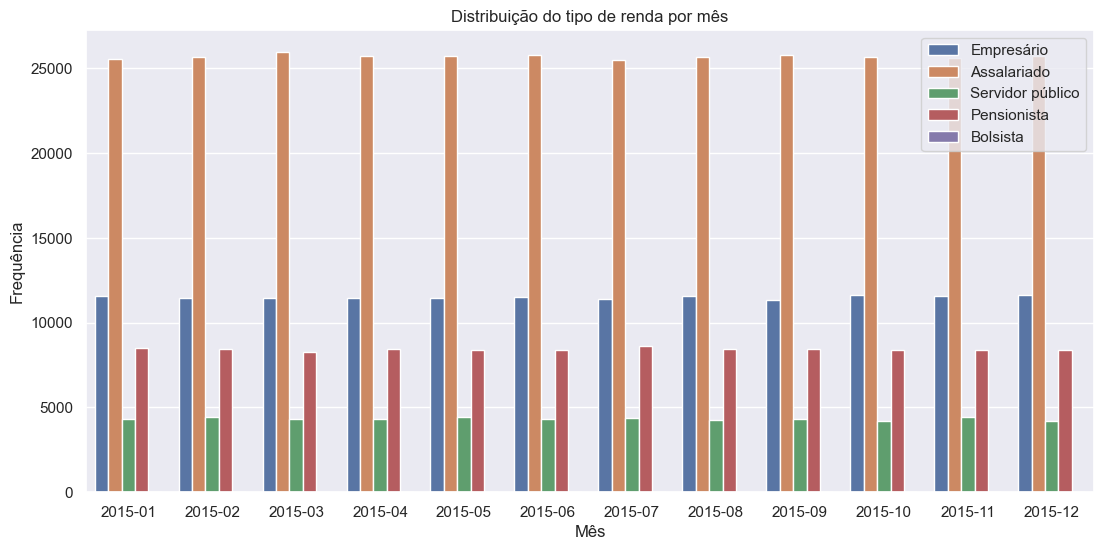

In [16]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='tipo_renda')
plt.legend(loc='best')
plt.title('Distribuição do tipo de renda por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')

plt.show()

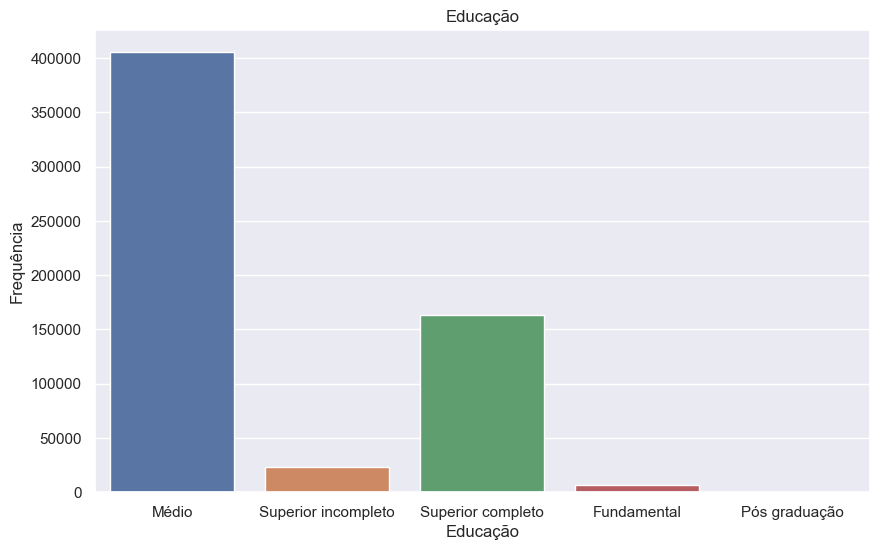

In [17]:
# Descritiva da variável educacao.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='educacao')
plt.title('Educação')
plt.ylabel('Frequência')
plt.xlabel('Educação')
plt.show()

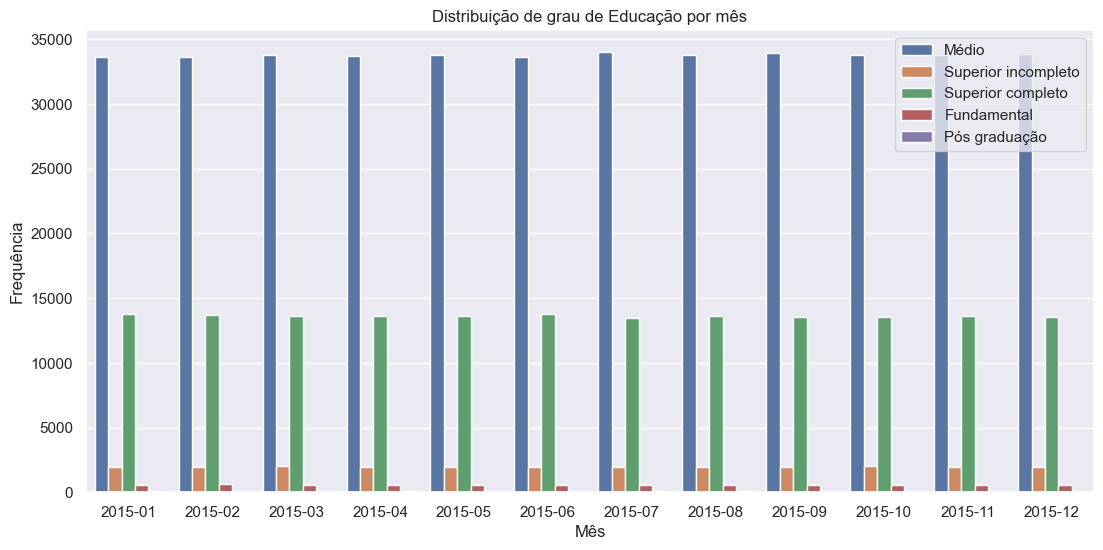

In [18]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='educacao')
plt.legend(loc='best')
plt.title('Distribuição de grau de Educação por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')

plt.show()

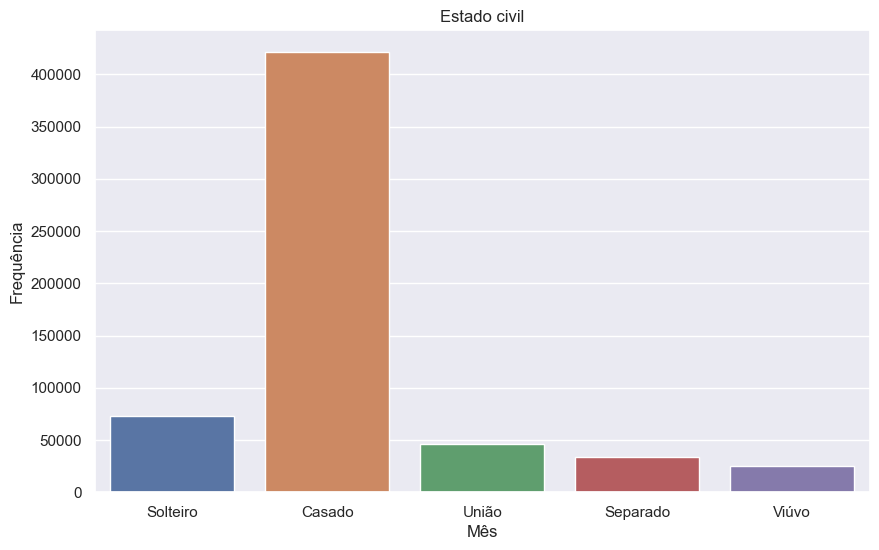

In [19]:
# Descritiva da variável estado_civil.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='estado_civil')
plt.title('Estado civil')
plt.ylabel('Frequência')
plt.xlabel('Mês')
plt.show()

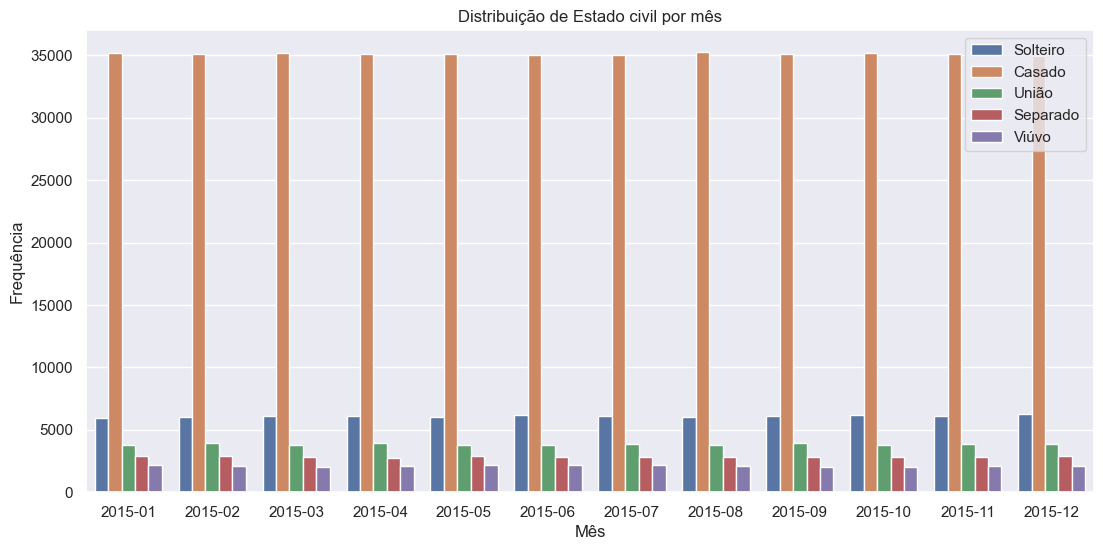

In [20]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='estado_civil')
plt.legend(loc='best')
plt.title('Distribuição de Estado civil por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')

plt.show()

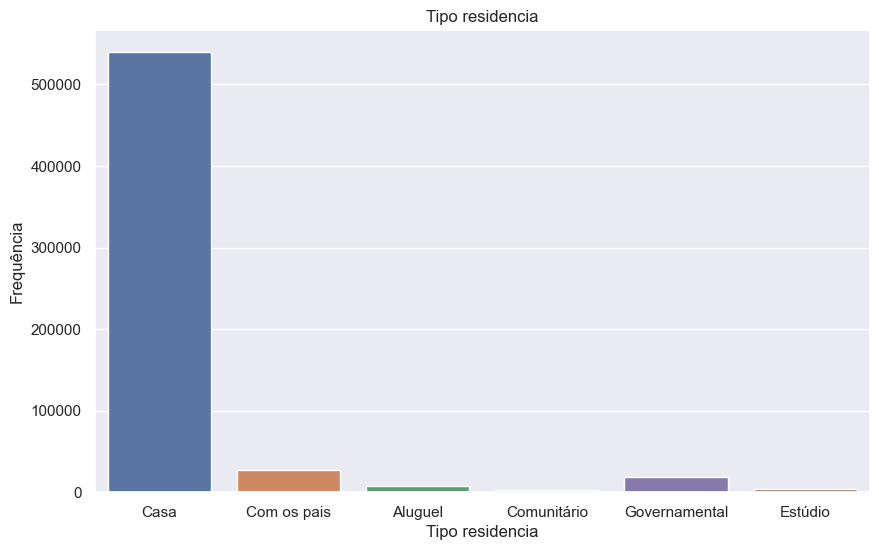

In [21]:
# Descritiva da variável tipo_residencia.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='tipo_residencia')
plt.title('Tipo residencia')
plt.ylabel('Frequência')
plt.xlabel('Tipo residencia')
plt.show()

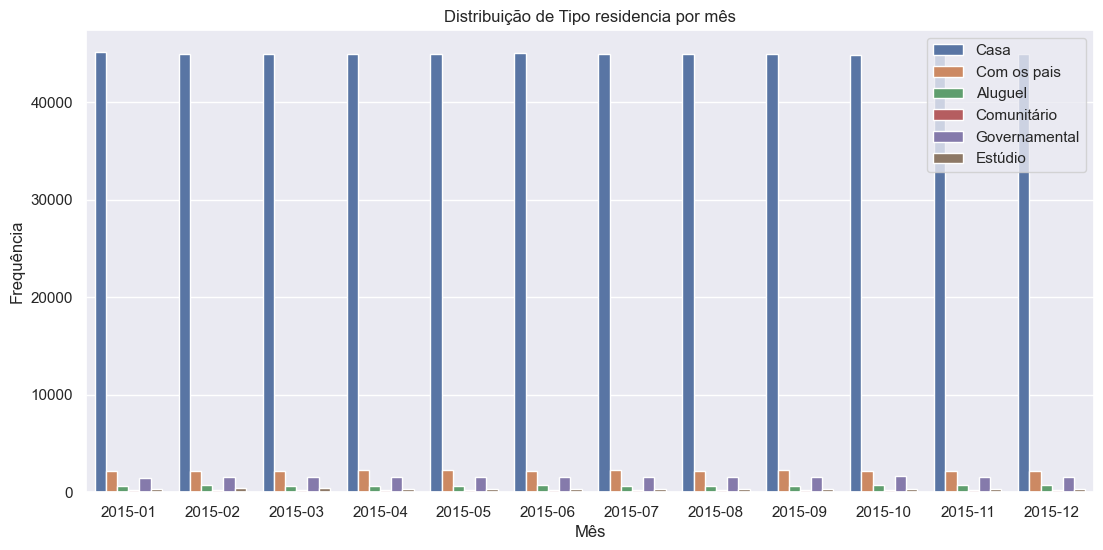

In [22]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='tipo_residencia')
plt.legend(loc='best')
plt.title('Distribuição de Tipo residencia por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')

plt.show()

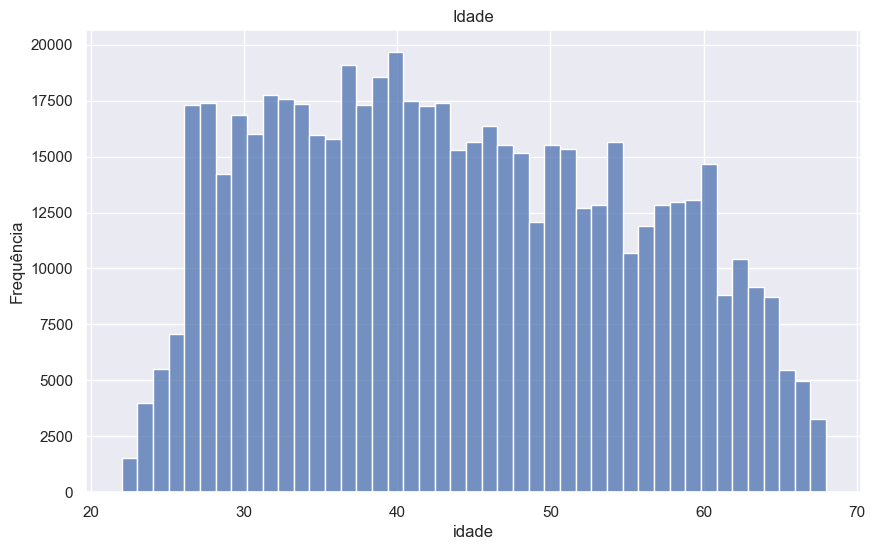

In [23]:
# Descritiva da variável idade.
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='idade', bins=45)
plt.title('Idade')
plt.ylabel('Frequência')
plt.xlabel('idade')
plt.show()

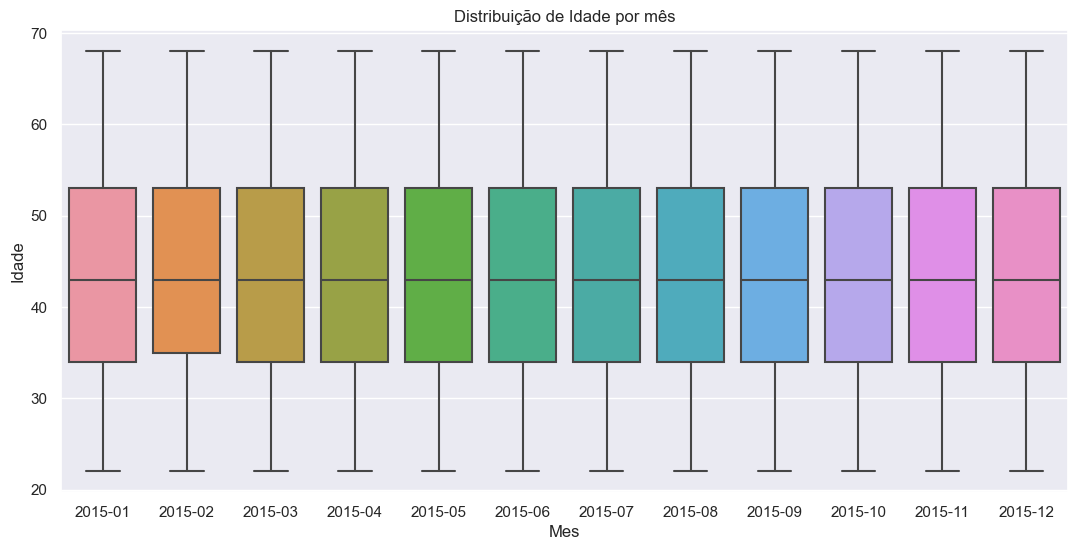

In [24]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=df_train, x='data_ref', y='idade')
plt.title('Distribuição de Idade por mês')
plt.xlabel('Mes')
plt.ylabel('Idade')

plt.show()

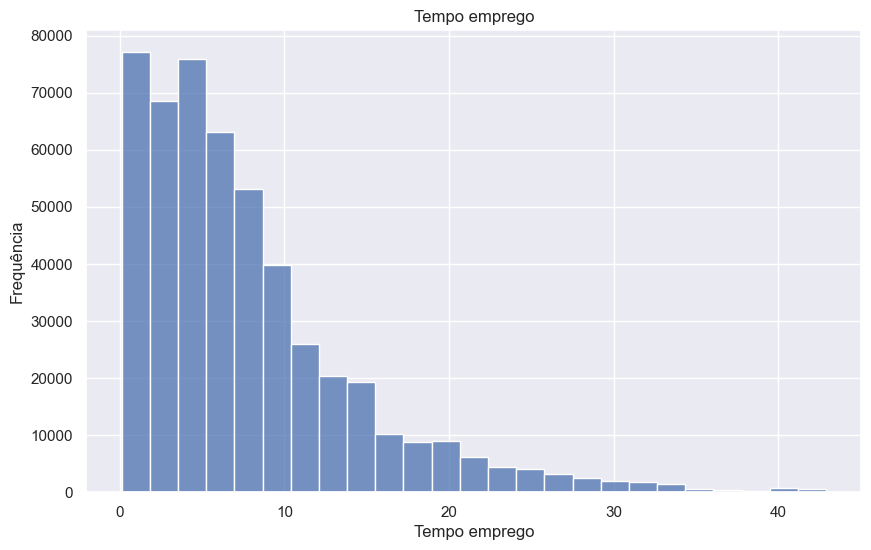

In [25]:
# Descritiva da variável tempo_emprego.
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='tempo_emprego', bins=25)
plt.title('Tempo emprego')
plt.ylabel('Frequência')
plt.xlabel('Tempo emprego')
plt.show()

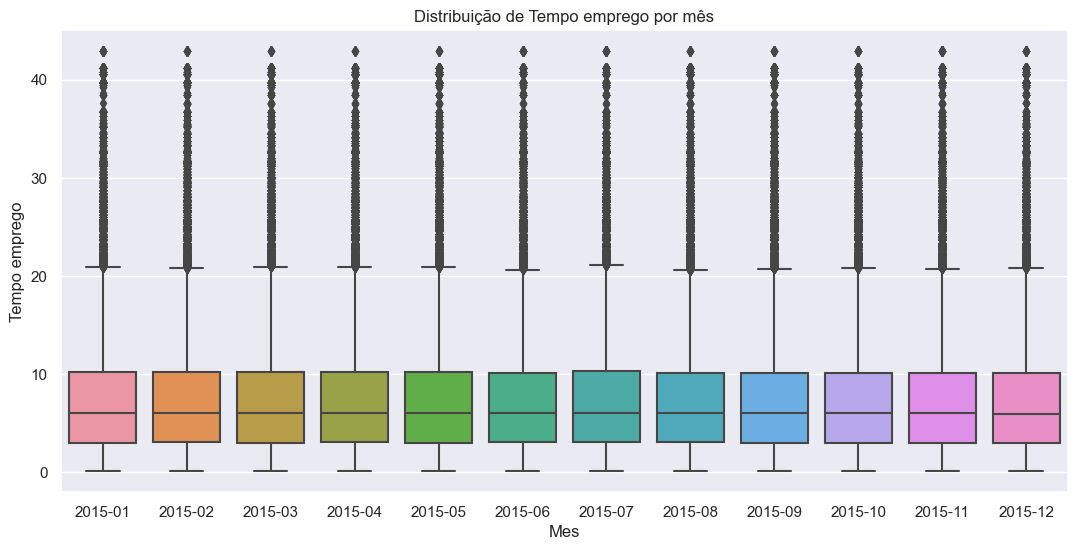

In [26]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=df_train, x='data_ref', y='tempo_emprego')
plt.title('Distribuição de Tempo emprego por mês')
plt.xlabel('Mes')
plt.ylabel('Tempo emprego')

plt.show()

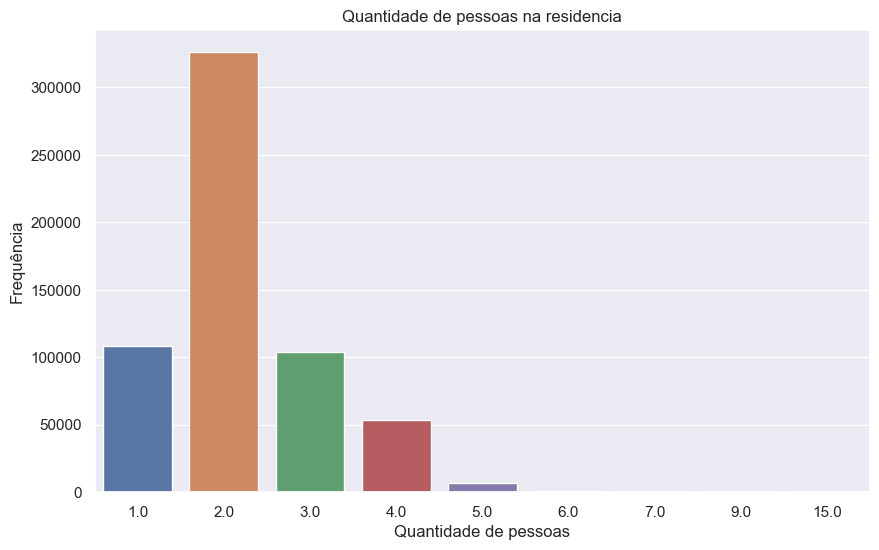

In [27]:
# Descritiva da variável qt_pessoas_residencia.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='qt_pessoas_residencia')
plt.title('Quantidade de pessoas na residencia')
plt.ylabel('Frequência')
plt.xlabel('Quantidade de pessoas')
plt.show()

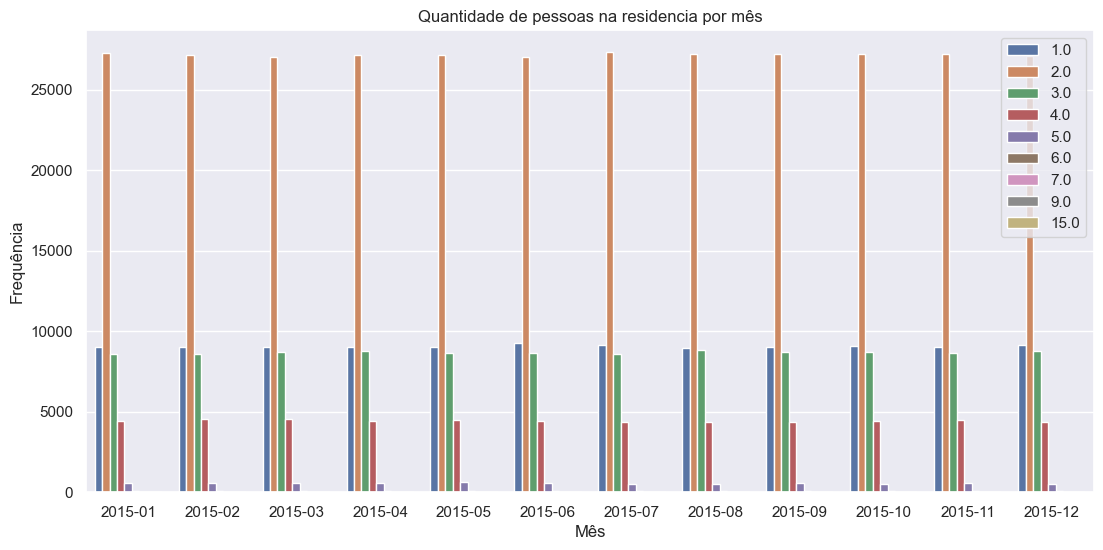

In [28]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='qt_pessoas_residencia')
plt.legend(loc='best')
plt.title('Quantidade de pessoas na residencia por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')

plt.show()

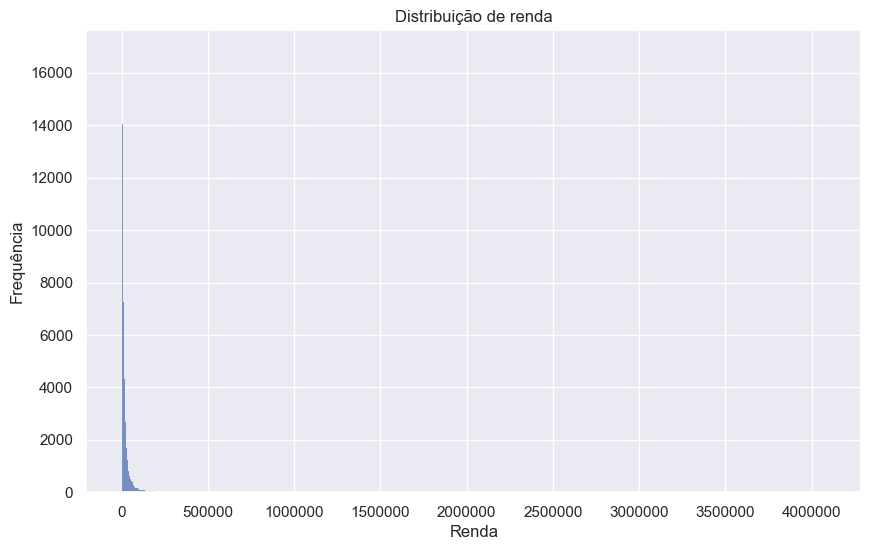

In [29]:
# Descritiva da variável renda.
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='renda')
plt.title('Distribuição de renda')
plt.ylabel('Frequência')
plt.xlabel('Renda')

plt.ticklabel_format(style='plain',
                     axis='x')  # Desativa a anotação científica no eixo X

plt.show()

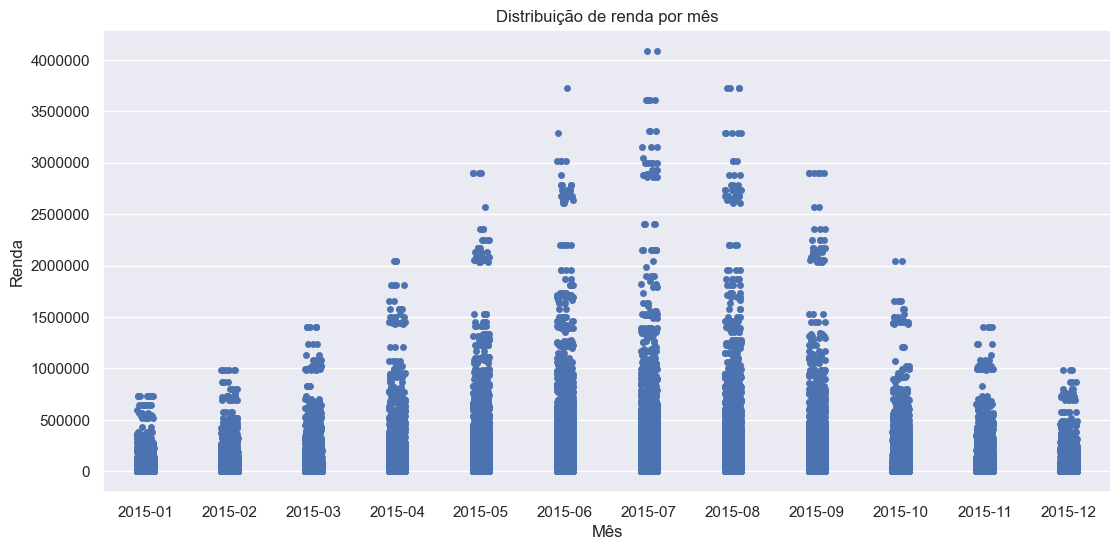

In [30]:
plt.figure(figsize=(13, 6))
sns.stripplot(data=df_train, x='data_ref', y='renda')
plt.title('Distribuição de renda por mês')
plt.xlabel('Mês')
plt.ylabel('Renda')

plt.ticklabel_format(style='plain',
                     axis='y')  # Desativa a anotação científica no eixo y

plt.show()

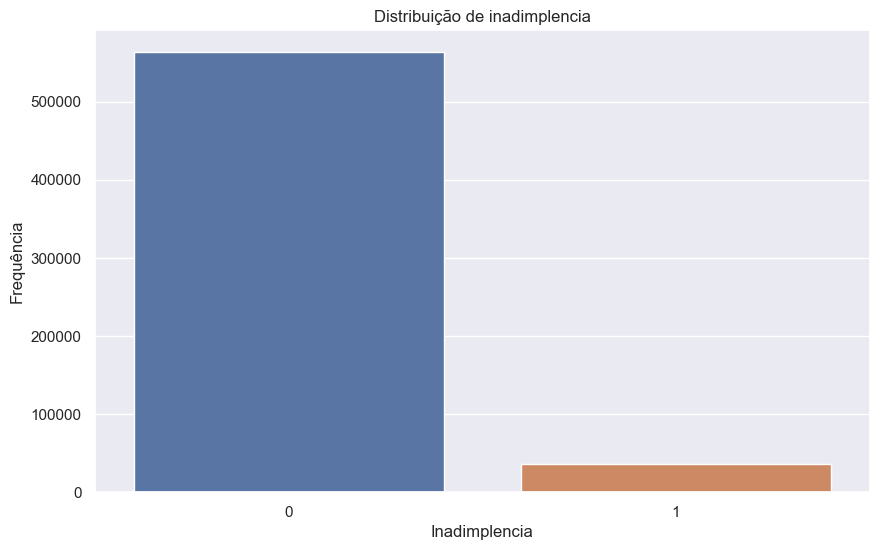

In [31]:
# Descritiva da variável mau.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='mau')
plt.title('Distribuição de inadimplencia')
plt.ylabel('Frequência')
plt.xlabel('Inadimplencia')
plt.show()

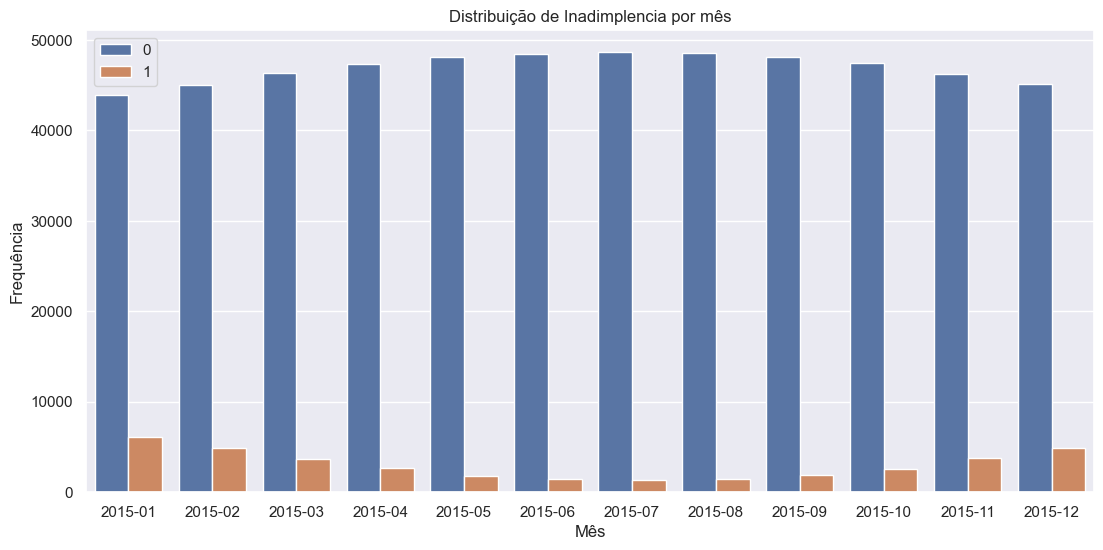

In [32]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='mau')
plt.legend(loc='best')
plt.title('Distribuição de Inadimplencia por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')

plt.show()

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

In [33]:
# Função para gerar os gráficos
def biva(x, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))

    sns.pointplot(x=x,
                  y='renda',
                  hue='mau',
                  data=df_train,
                  dodge=True,
                  errorbar=('ci', 95))
    plt.title(title)
    plt.legend(loc='best')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

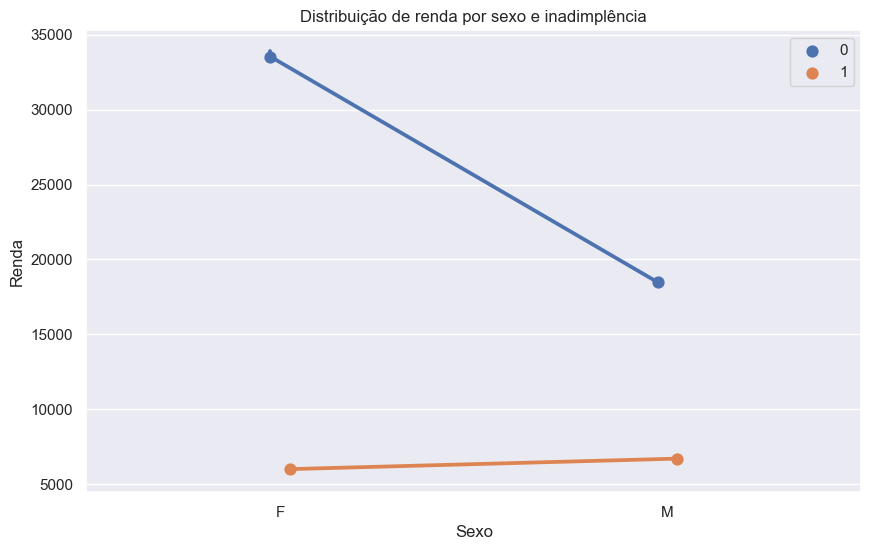

In [34]:
biva("sexo", "Distribuição de renda por sexo e inadimplência", "Sexo", "Renda")

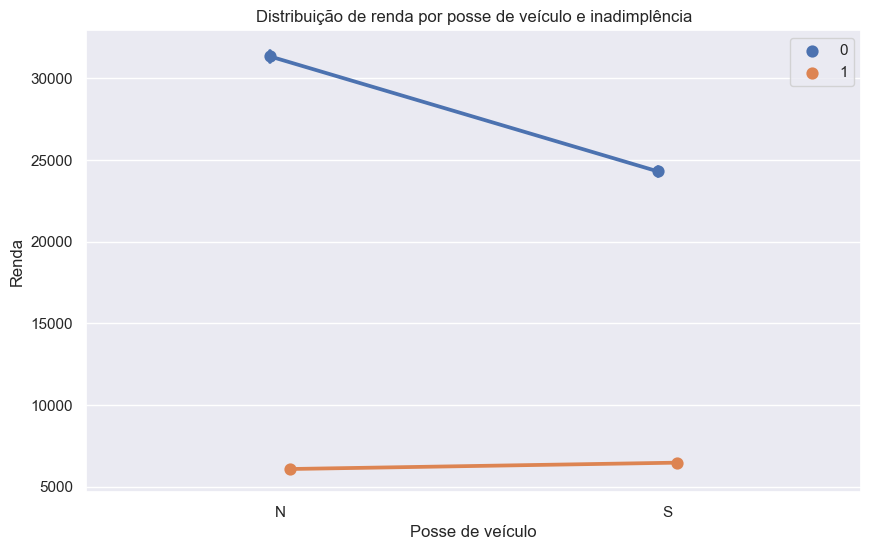

In [35]:
biva("posse_de_veiculo",
     "Distribuição de renda por posse de veículo e inadimplência",
     "Posse de veículo", "Renda")

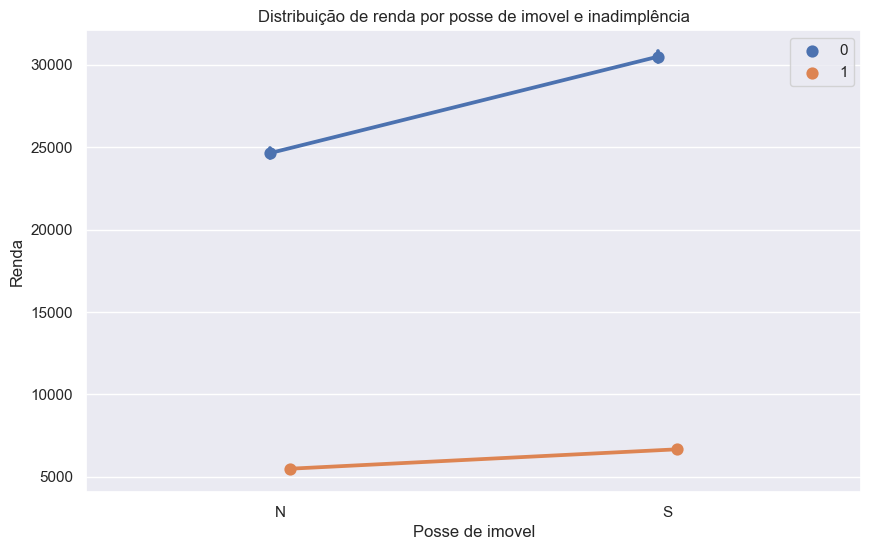

In [36]:
biva("posse_de_imovel",
     "Distribuição de renda por posse de imovel e inadimplência",
     "Posse de imovel", "Renda")

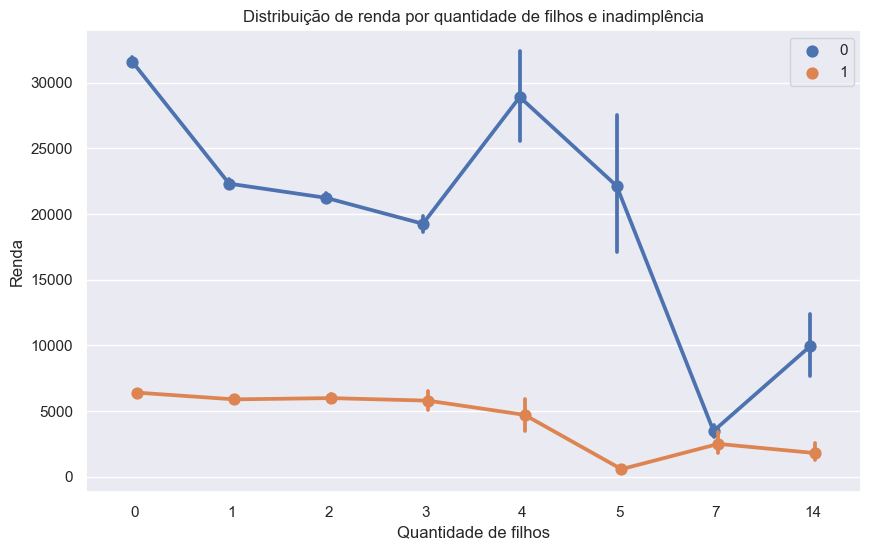

In [37]:
biva("qtd_filhos",
     "Distribuição de renda por quantidade de filhos e inadimplência",
     "Quantidade de filhos", "Renda")

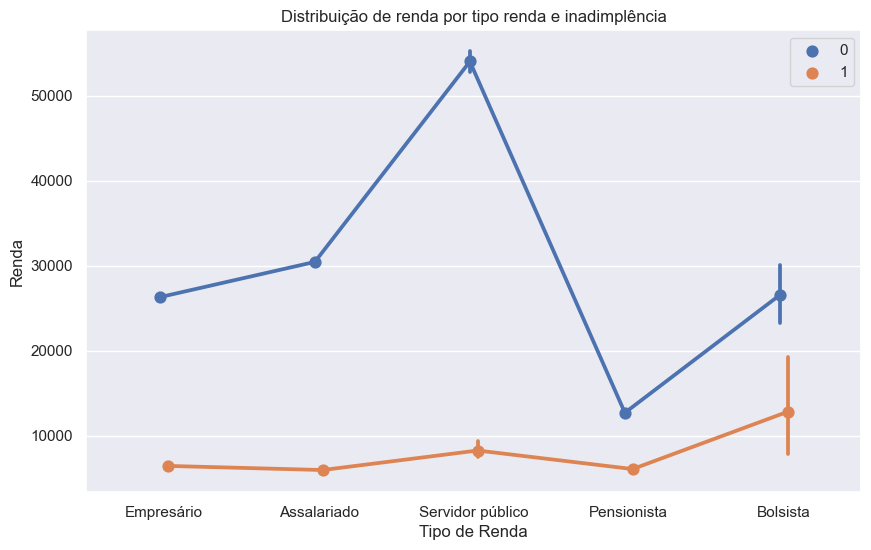

In [38]:
biva("tipo_renda", "Distribuição de renda por tipo renda e inadimplência",
     "Tipo de Renda", "Renda")

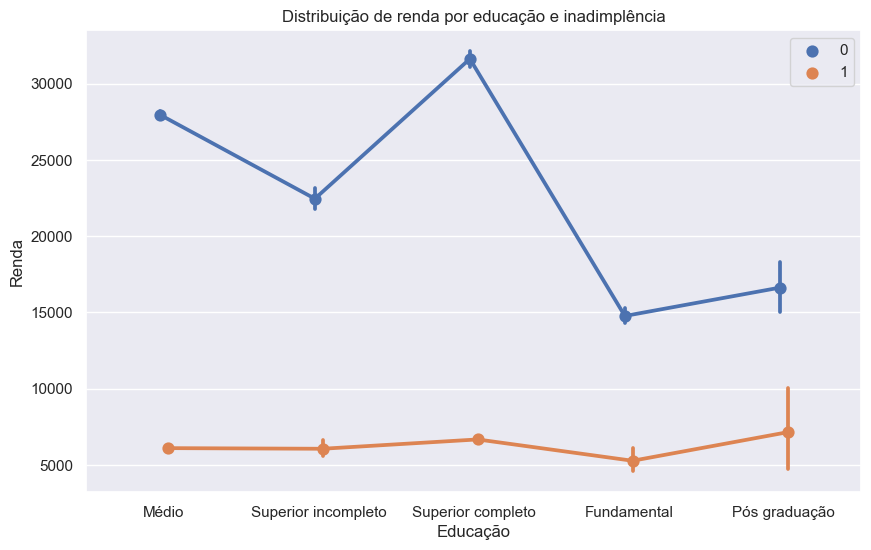

In [39]:
biva("educacao", "Distribuição de renda por educação e inadimplência",
     "Educação", "Renda")

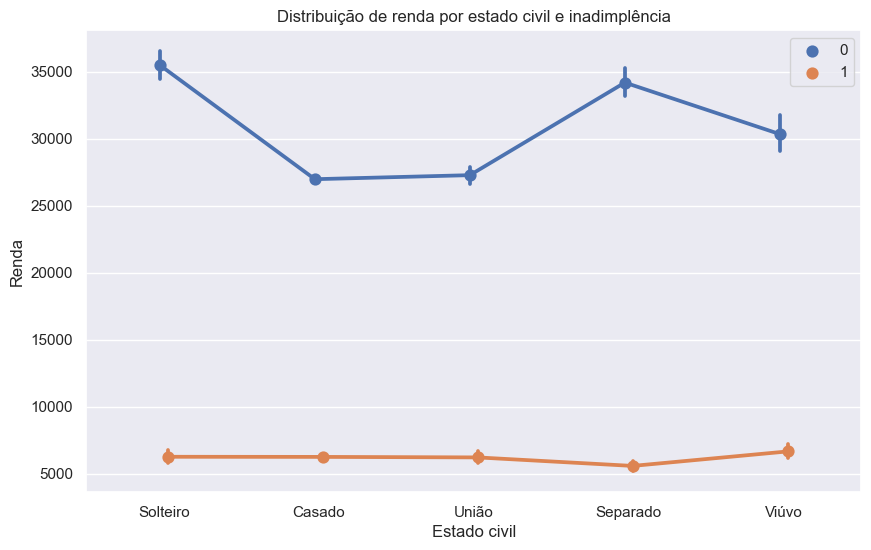

In [40]:
biva("estado_civil", "Distribuição de renda por estado civil e inadimplência",
     "Estado civil", "Renda")

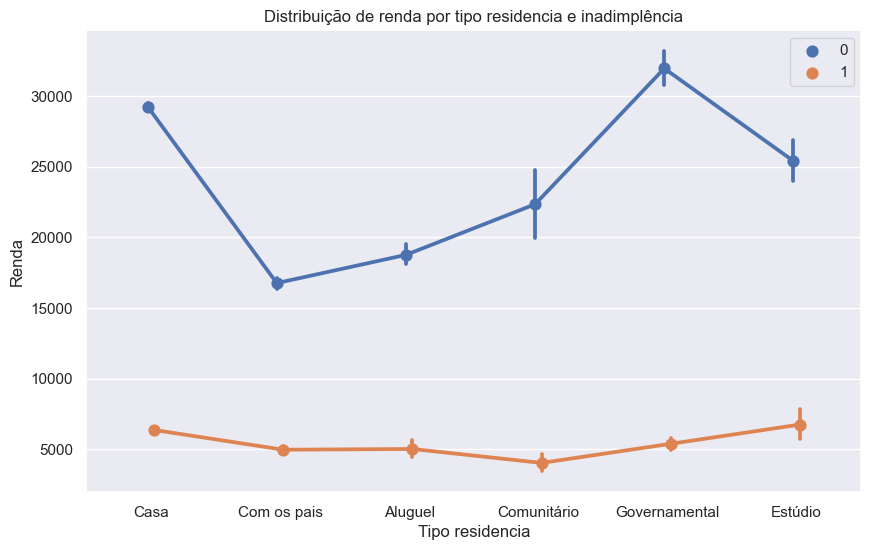

In [41]:
biva("tipo_residencia",
     "Distribuição de renda por tipo residencia e inadimplência",
     "Tipo residencia", "Renda")

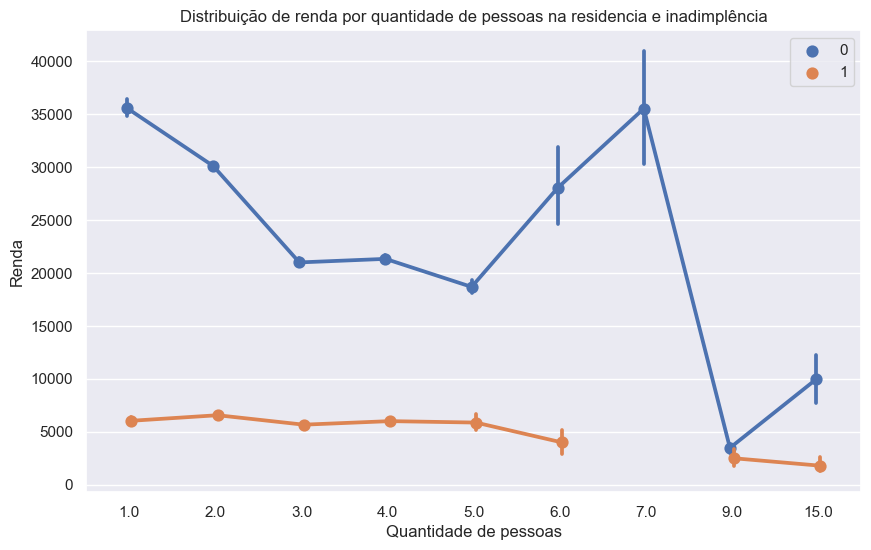

In [42]:
biva(
    "qt_pessoas_residencia",
    "Distribuição de renda por quantidade de pessoas na residencia e inadimplência",
    "Quantidade de pessoas", "Renda")

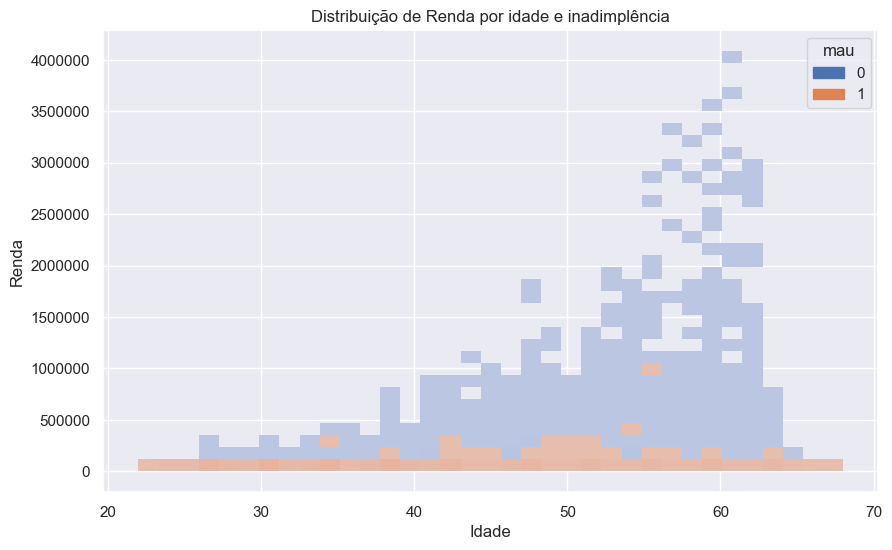

In [43]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_train, x='idade', y='renda', hue='mau', bins=35)
plt.title('Distribuição de Renda por idade e inadimplência')
plt.xlabel('Idade')
plt.ylabel("Renda")

plt.ticklabel_format(style='plain',
                     axis='y')  # Desativa a anotação científica no eixo y

plt.show()

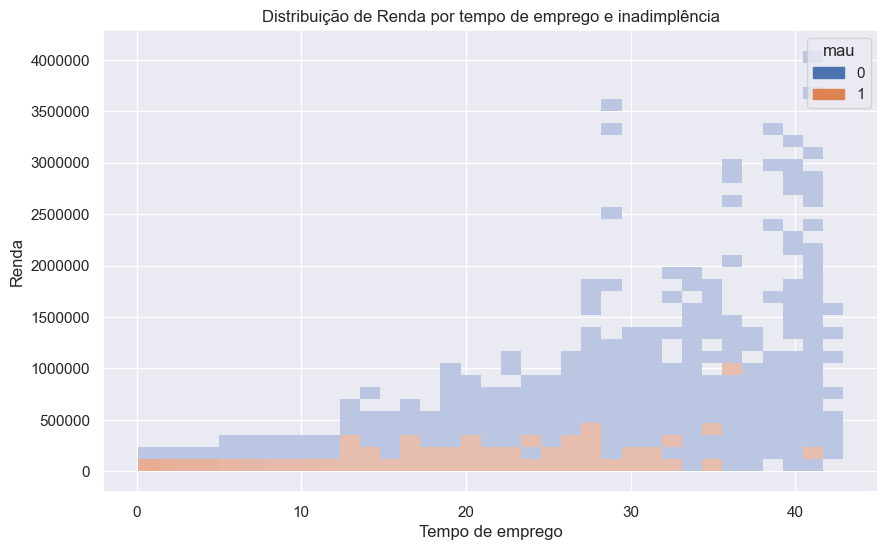

In [44]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_train, x='tempo_emprego', y='renda', hue='mau', bins=35)
plt.title('Distribuição de Renda por tempo de emprego e inadimplência')
plt.xlabel('Tempo de emprego')
plt.ylabel("Renda")

plt.ticklabel_format(style='plain',
                     axis='y')  # Desativa a anotação científica no eixo y

plt.show()

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [45]:
# Verificando e tratando valores nulos
df_train.isna().sum()

data_ref                      0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            100875
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64

In [46]:
df.tempo_emprego.fillna(df.tempo_emprego.mean(), inplace=True)
df_train.tempo_emprego.fillna(df.tempo_emprego.mean(), inplace=True)
df_test.tempo_emprego.fillna(df.tempo_emprego.mean(), inplace=True)

/var/folders/lh/hj21t5rn6fg9r84_yy383zfm0000gn/T/ipykernel_4648/3807117363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.tempo_emprego.fillna(df.tempo_emprego.mean(), inplace=True)
/var/folders/lh/hj21t5rn6fg9r84_yy383zfm0000gn/T/ipykernel_4648/3807117363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.tempo_emprego.fillna(df.tempo_emprego.mean(), inplace=True)


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 599999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype    
---  ------                 --------------   -----    
 0   data_ref               600000 non-null  period[M]
 1   sexo                   600000 non-null  object   
 2   posse_de_veiculo       600000 non-null  object   
 3   posse_de_imovel        600000 non-null  object   
 4   qtd_filhos             600000 non-null  int64    
 5   tipo_renda             600000 non-null  object   
 6   educacao               600000 non-null  object   
 7   estado_civil           600000 non-null  object   
 8   tipo_residencia        600000 non-null  object   
 9   idade                  600000 non-null  int64    
 10  tempo_emprego          600000 non-null  float64  
 11  qt_pessoas_residencia  600000 non-null  float64  
 12  renda                  600000 non-null  float64  
 13  mau                    600000 non-null  int64    
dtypes: f

In [48]:
# Remoção de outliers
df_train.tempo_emprego.describe()

count    600000.000000
mean          7.748090
std           6.100461
min           0.117808
25%           3.635616
50%           7.473973
75%           9.069863
max          42.906849
Name: tempo_emprego, dtype: float64

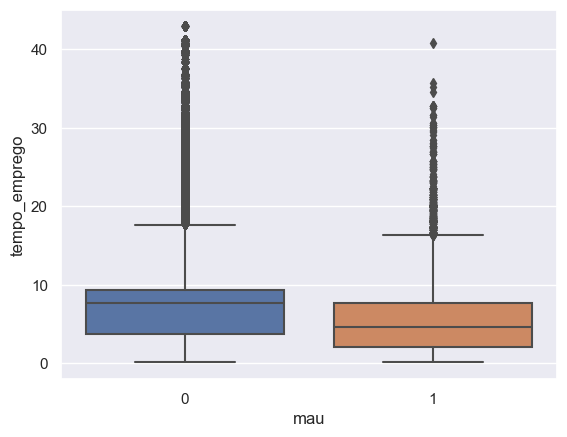

In [49]:
sns.boxplot(data=df_train, x='mau', y='tempo_emprego')
plt.show()

In [51]:
# Remover os outliers de tempo de emprego
emprego = df_train['tempo_emprego'].loc[df_train['mau'] == 1].values

# Valores do quartil 25 e quartil 75
q25, q75 = np.percentile(emprego, 25), np.percentile(emprego, 75)
print('QUARTIL 25: {} | QUARTIL 75: {}'.format(q25, q75))

# Interquartile range
emprego_iqr = q75 - q25
print('IQR: ', emprego_iqr)

# Limiar
emprego_cut_off = emprego_iqr * 1.5
# Limite superior e inferior
emprego_lower, emprego_upper = q25 - emprego_cut_off, q75 + emprego_cut_off
print('LIMIAR: ', emprego_cut_off)
print('Tempo emprego LIMITE INFERIOR', emprego_lower)
print('Tempo emprego LIMITE SUPERIOR', emprego_upper)

# Ouliers (fora os limites estabelecidos anteriormente)
outliers = [x for x in emprego if x < emprego_lower or x > emprego_upper]
print('Tempo emprego QUANTIDADE DE OUTLIERS EM MAU PAGADORES:', len(outliers))

# Novo dataframe sem os outliers
df_train = df_train.drop(
    df_train[(df_train['tempo_emprego'] > emprego_upper) |
             (df_train['tempo_emprego'] < emprego_lower)].index)
print('----')

QUARTIL 25: 2.0136986301369864 | QUARTIL 75: 7.748574052205171
IQR:  5.7348754220681855
LIMIAR:  8.602313133102278
Tempo emprego LIMITE INFERIOR -6.588614502965292
Tempo emprego LIMITE SUPERIOR 16.35088718530745
Tempo emprego QUANTIDADE DE OUTLIERS EM MAU PAGADORES: 0
----


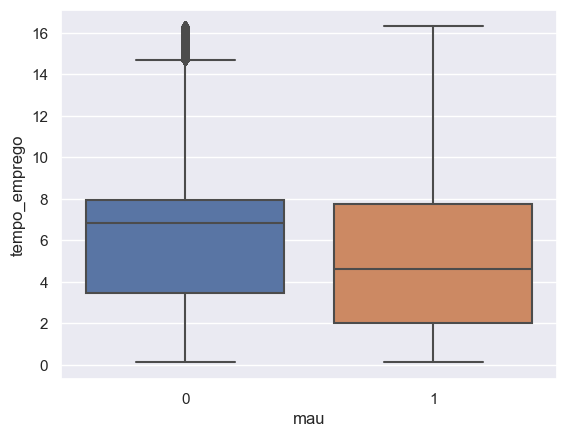

In [52]:
sns.boxplot(data=df_train, x='mau', y='tempo_emprego')
plt.show()

In [53]:
# Removendo a coluna data_ref dos dataframes
df = df.drop(['data_ref'], axis=1)
df_train = df_train.drop(['data_ref'], axis=1)
df_test = df_test.drop(['data_ref'], axis=1)

In [54]:
# Calculando IV e gerando metadados.

metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['missing'] = df.isna().sum()
metadados['valores_unicos'] = df.nunique()

In [55]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento] / tab.loc['total', rótulo_evento]
    tab['ep'] = tab[rótulo_evento] / tab.loc['total', rótulo_evento]

    tab['pct_nao_evento'] = tab[rótulo_nao_evento] / tab.loc['total',
                                                             rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento / tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento) * tab.woe
    return tab['iv_parcial'].sum()

In [56]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['missing'] = df.isna().sum()
metadados['valores_unicos'] = df.nunique()
metadados['papel'] = 'covariavel'
metadados.loc['mau', 'papel'] = 'resposta'
metadados.loc['bom', 'papel'] = 'resposta'

metadados

,dtype,missing,valores_unicos,papel
sexo,object,0.0,2.0,covariavel
posse_de_veiculo,object,0.0,2.0,covariavel
posse_de_imovel,object,0.0,2.0,covariavel
qtd_filhos,int64,0.0,8.0,covariavel
tipo_renda,object,0.0,5.0,covariavel
educacao,object,0.0,5.0,covariavel
estado_civil,object,0.0,5.0,covariavel
tipo_residencia,object,0.0,6.0,covariavel
idade,int64,0.0,47.0,covariavel
tempo_emprego,float64,0.0,3005.0,covariavel


In [58]:
for var in metadados[metadados.papel=='covariavel'].index:
    if  (metadados.loc[var, 'valores_unicos']>6):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df[var],5,duplicates='drop'), df.mau)
    else: 
        metadados.loc[var, 'IV'] = IV(df[var], df.mau)

metadados

,dtype,missing,valores_unicos,papel,IV
sexo,object,0.0,2.0,covariavel,0.002185
posse_de_veiculo,object,0.0,2.0,covariavel,0.000108
posse_de_imovel,object,0.0,2.0,covariavel,0.009693
qtd_filhos,int64,0.0,8.0,covariavel,0.000030
tipo_renda,object,0.0,5.0,covariavel,0.009360
educacao,object,0.0,5.0,covariavel,0.003547
estado_civil,object,0.0,5.0,covariavel,0.001126
tipo_residencia,object,0.0,6.0,covariavel,0.003045
idade,int64,0.0,47.0,covariavel,0.017968
tempo_emprego,float64,0.0,3005.0,covariavel,0.278819


In [65]:
# Tratando 'zeros estruturais'
# Fazendo agrupamentos de categorias conforme visto em aula

def biv_discreta(var, df):
    df['bom'] = 1 - df.mau
    g = df.groupby(var)

    biv = pd.DataFrame({
        'qt_bom': g['bom'].sum(),
        'qt_mau': g['mau'].sum(),
        'mau': g['mau'].mean(),
        var: g['mau'].mean().index,
        'cont': g[var].count()
    })

    biv['ep'] = (biv.mau * (1 - biv.mau) / biv.cont)**.5
    biv['mau_sup'] = biv.mau + t.ppf([0.975], biv.cont - 1) * biv.ep
    biv['mau_inf'] = biv.mau + t.ppf([0.025], biv.cont - 1) * biv.ep

    biv['logit'] = np.log(biv.mau / (1 - biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup / (1 - biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_inf / (1 - biv.mau_inf))

    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))

    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral

    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    ax[0].plot(biv[var], biv.woe, ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite inferior')

    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat - .7])

    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)

    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15, ha='right')

    ax[1] = biv.cont.plot.bar()
    return biv

In [81]:
def biv_continua(var, ncat, df):
    df['bom'] = 1 - df.mau
    cat_srs, bins = pd.qcut(df[var],
                            ncat,
                            retbins=True,
                            precision=0,
                            duplicates='drop')
    g = df.groupby(cat_srs)

    biv = pd.DataFrame({
        'qt_bom': g['bom'].sum(),
        'qt_mau': g['mau'].sum(),
        'mau': g['mau'].mean(),
        var: g[var].mean(),
        'cont': g[var].count()
    })

    biv['ep'] = (biv.mau * (1 - biv.mau) / biv.cont)**.5
    biv['mau_sup'] = biv.mau + t.ppf([0.975], biv.cont - 1) * biv.ep
    biv['mau_inf'] = biv.mau + t.ppf([0.025], biv.cont - 1) * biv.ep

    biv['logit'] = np.log(biv.mau / (1 - biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup / (1 - biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_inf / (1 - biv.mau_inf))

    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))

    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral

    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    ax[0].plot(biv[var], biv.woe, ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite inferior')

    num_cat = biv.shape[0]

    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)

    ax[1] = biv.cont.plot.bar()
    return None

,qt_bom,qt_mau,mau,tipo_renda,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_renda,,,,,,,,,,,,,,
Assalariado,256732,19272,0.069825,Assalariado,276004,0.000485,0.070776,0.068874,-2.589379,-2.574832,-2.604111,0.061221,0.075768,0.046489
Bolsista,279,12,0.041237,Bolsista,291,0.011656,0.064178,0.018296,-3.146305,-2.679758,-3.982616,-0.495705,-0.029158,-1.332016
Empresário,120898,8139,0.063075,Empresário,129037,0.000677,0.064401,0.061749,-2.698280,-2.676052,-2.720948,-0.047679,-0.025452,-0.070347
Pensionista,94627,6500,0.064276,Pensionista,101127,0.000771,0.065787,0.062764,-2.678141,-2.653280,-2.703552,-0.027540,-0.002679,-0.052952
Servidor público,39893,2259,0.053592,Servidor público,42152,0.001097,0.055742,0.051442,-2.871279,-2.829670,-2.914493,-0.220678,-0.179070,-0.263893


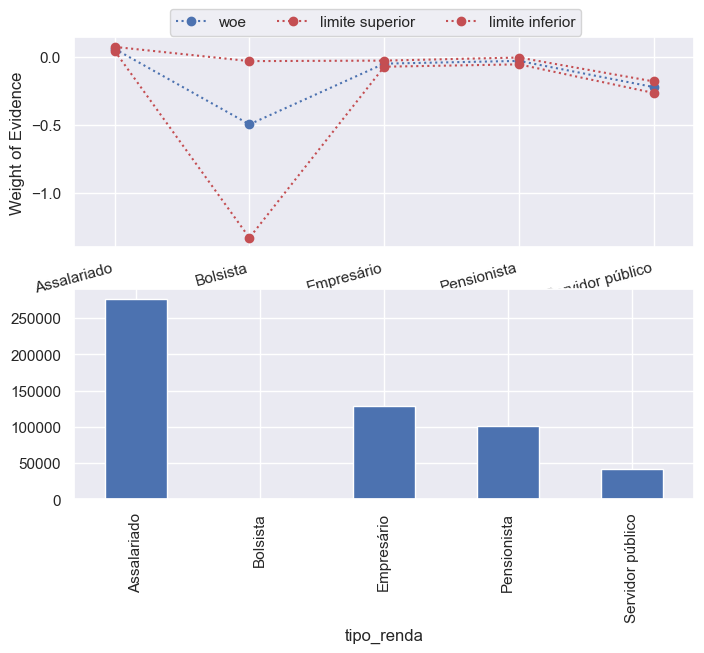

In [85]:
biv_discreta('tipo_renda', df_train)

,qt_bom,qt_mau,mau,tipo_renda,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_renda,,,,,,,,,,,,,,
Empresário,120898,8139,0.063075,Empresário,129037,0.000677,0.064401,0.061749,-2.69828,-2.676052,-2.720948,-0.047679,-0.025452,-0.070347
Renda fixa,351359,25772,0.068337,Renda fixa,377131,0.000411,0.069142,0.067532,-2.61252,-2.599940,-2.625238,0.038081,0.050661,0.025362
Serv.Publico./Estudante,40172,2271,0.053507,Serv.Publico./Estudante,42443,0.001092,0.055648,0.051366,-2.87295,-2.831451,-2.916046,-0.222350,-0.180851,-0.265446


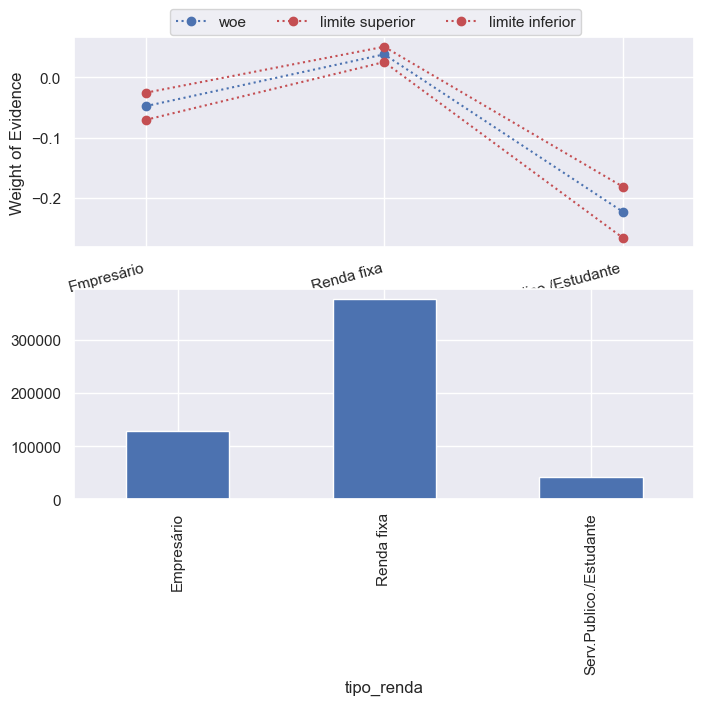

In [86]:
df1_train = df_train.copy()
df1_train.tipo_renda.replace(
    {
        'Bolsista': 'Serv.Publico./Estudante',
        'Servidor público': 'Serv.Publico./Estudante',
        'Assalariado': 'Renda fixa',
        'Pensionista': 'Renda fixa'
    },
    inplace=True)
biv_discreta('tipo_renda', df1_train)

,qt_bom,qt_mau,mau,tipo_residencia,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_residencia,,,,,,,,,,,,,,
Aluguel,7422,593,0.073986,Aluguel,8015,0.002924,0.079717,0.068255,-2.527009,-2.446192,-2.613807,0.123591,0.204409,0.036793
Casa,460658,32028,0.065007,Casa,492686,0.000351,0.065695,0.064319,-2.666045,-2.654775,-2.677428,-0.015445,-0.004174,-0.026827
Com os pais,23426,1979,0.077898,Com os pais,25405,0.001681,0.081194,0.074602,-2.471255,-2.426236,-2.518053,0.179346,0.224365,0.132547
Comunitário,2247,184,0.075689,Comunitário,2431,0.005365,0.086209,0.065169,-2.502416,-2.360833,-2.663374,0.148185,0.289768,-0.012774
Estúdio,3772,222,0.055583,Estúdio,3994,0.003625,0.062691,0.048476,-2.832683,-2.704794,-2.977003,-0.182083,-0.054193,-0.326403
Governamental,14904,1176,0.073134,Governamental,16080,0.002053,0.077159,0.069110,-2.539511,-2.481592,-2.600444,0.111090,0.169009,0.050157


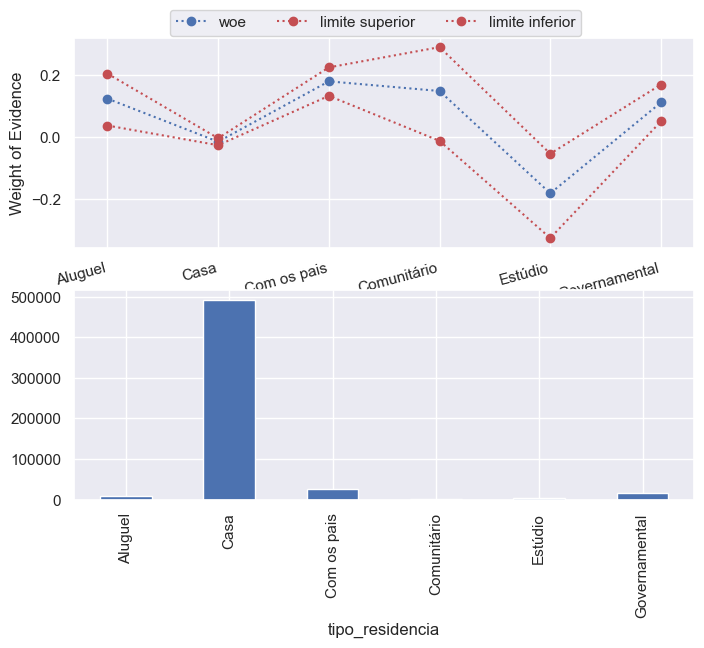

In [87]:
biv_discreta('tipo_residencia', df_train)

,qt_bom,qt_mau,mau,tipo_residencia,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_residencia,,,,,,,,,,,,,,
Aluguel/comunitario/Auxilio,47999,3932,0.075716,Aluguel/comunitario/Auxilio,51931,0.001161,0.077991,0.073441,-2.502032,-2.469959,-2.535002,0.148568,0.180641,0.115598
Casa,464430,32250,0.064931,Casa,496680,0.000350,0.065616,0.064246,-2.667293,-2.656061,-2.678635,-0.016692,-0.005461,-0.028035


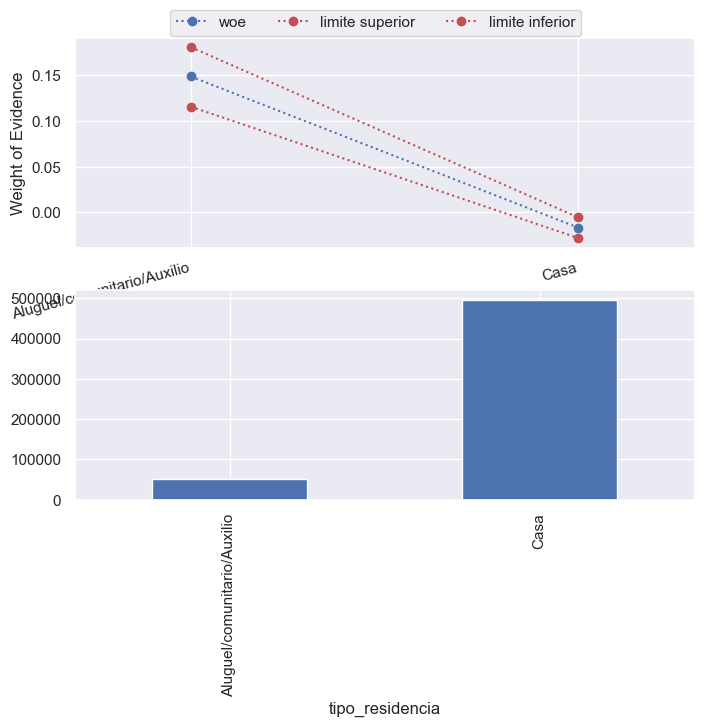

In [88]:
df1_train.tipo_residencia.replace(
    {
        'Aluguel': 'Aluguel/comunitario/Auxilio',
        'Com os pais': 'Aluguel/comunitario/Auxilio',
        'Comunitário': 'Aluguel/comunitario/Auxilio',
        'Estúdio': 'Casa',
        'Governamental' : 'Aluguel/comunitario/Auxilio'
    },
    inplace=True)
biv_discreta('tipo_residencia', df1_train)

,qt_bom,qt_mau,mau,educacao,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
educacao,,,,,,,,,,,,,,
Fundamental,6332,480,0.070464,Fundamental,6812,0.003101,0.076542,0.064385,-2.579585,-2.490279,-2.676319,0.071015,0.160322,-0.025718
Médio,342759,25160,0.068385,Médio,367919,0.000416,0.069200,0.067569,-2.611772,-2.599040,-2.624645,0.038828,0.051560,0.025955
Pós graduação,573,41,0.066775,Pós graduação,614,0.010074,0.086560,0.046991,-2.637314,-2.356384,-3.009672,0.013287,0.294216,-0.359072
Superior completo,142094,8989,0.059497,Superior completo,151083,0.000609,0.060690,0.058304,-2.760487,-2.739368,-2.782007,-0.109887,-0.088768,-0.131406
Superior incompleto,20671,1512,0.068160,Superior incompleto,22183,0.001692,0.071477,0.064844,-2.615298,-2.564220,-2.668734,0.035302,0.086380,-0.018134


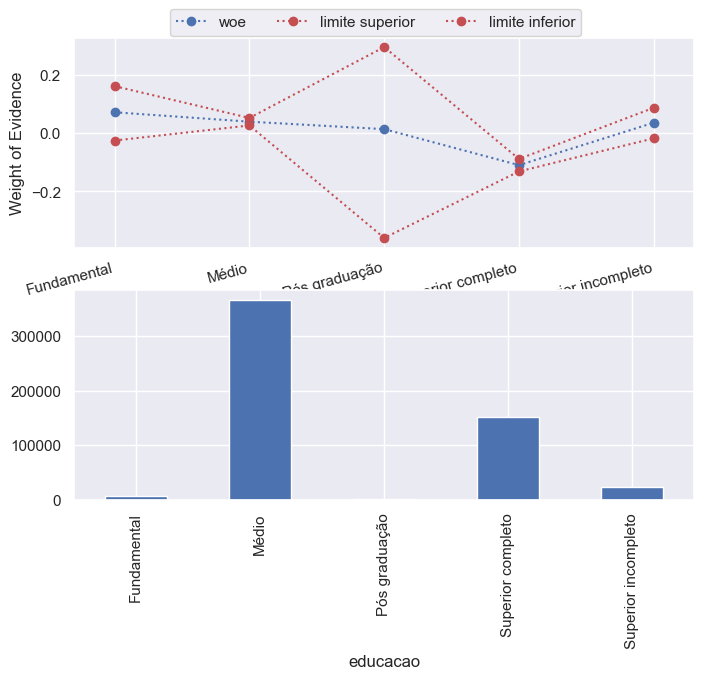

In [89]:
biv_discreta('educacao', df1_train)

,qt_bom,qt_mau,mau,educacao,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
educacao,,,,,,,,,,,,,,
Ens. Superior,163338,10542,0.060628,Ens. Superior,173880,0.000572,0.061750,0.059506,-2.740454,-2.720927,-2.760323,-0.089854,-0.070327,-0.109722
Medio ou inferior,349091,25640,0.068422,Medio ou inferior,374731,0.000412,0.069231,0.067614,-2.611179,-2.598566,-2.623931,0.039421,0.052034,0.026670


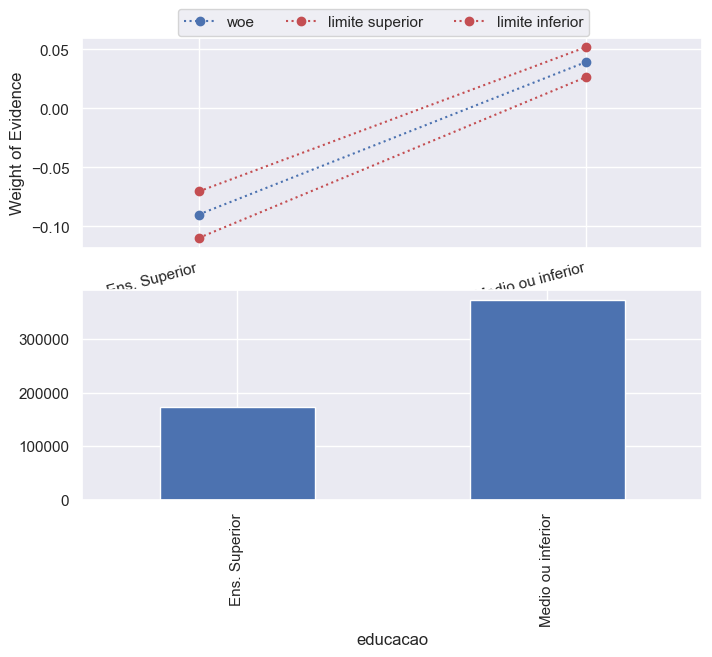

In [90]:
df1_train.educacao.replace(
    {
        'Fundamental': 'Medio ou inferior',
        'Médio': 'Medio ou inferior',
        'Superior completo': 'Ens. Superior',
        'Pós graduação': 'Ens. Superior',
        'Superior incompleto': 'Ens. Superior'
    },
    inplace=True)

biv_discreta('educacao', df1_train)

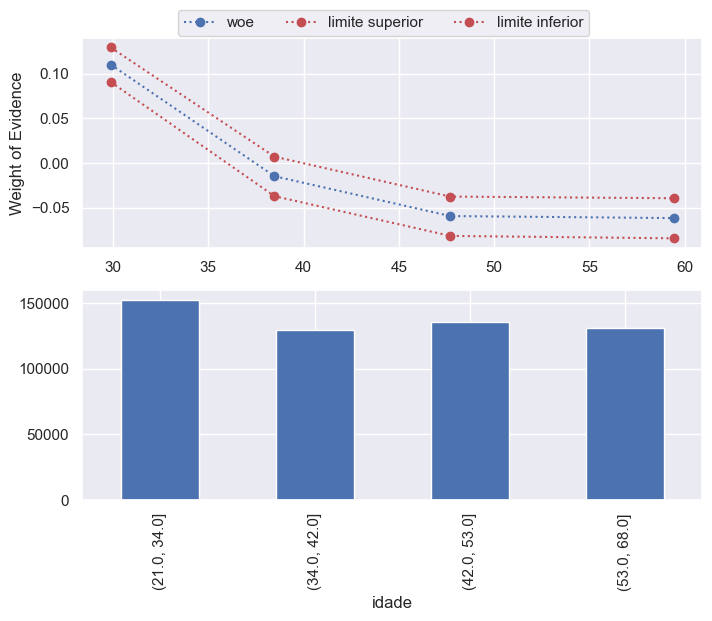

In [91]:
biv_continua('idade', 4, df1_train)

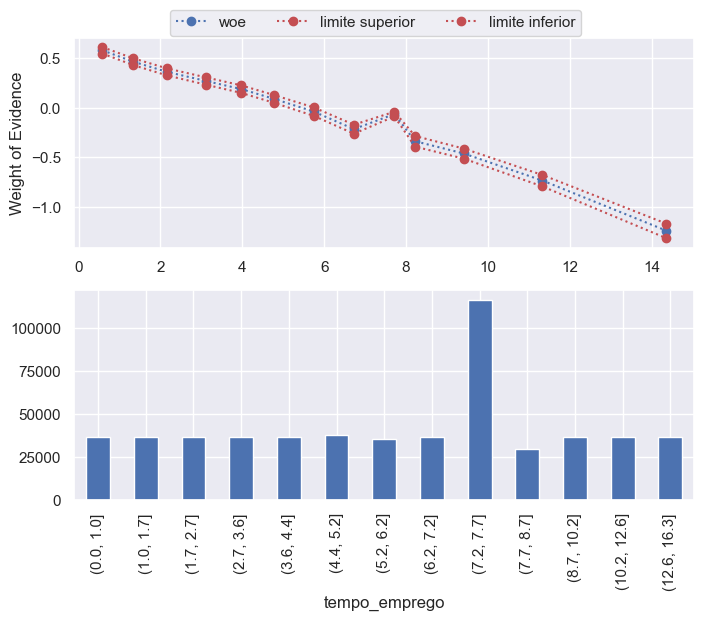

In [92]:
biv_continua('tempo_emprego', 15, df1_train)

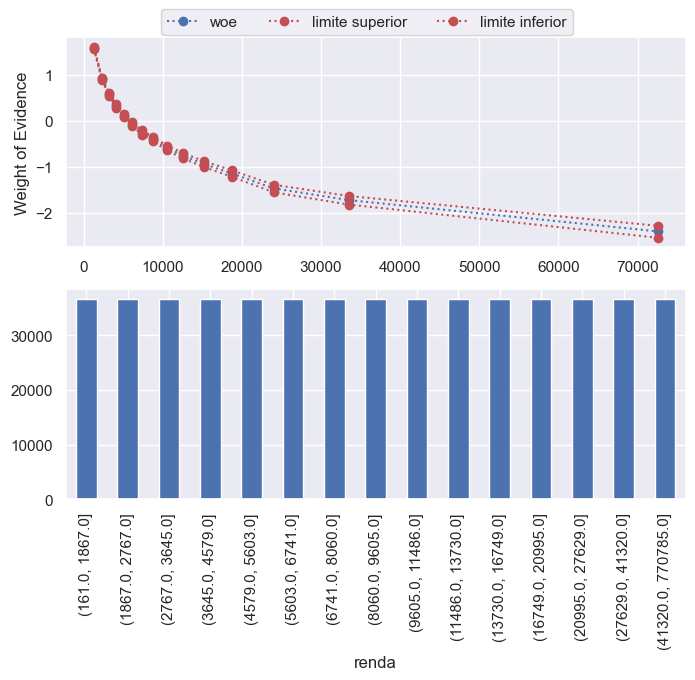

In [93]:
biv_continua('renda', 15, df1_train)

In [94]:
# Refletindo as mudanças nas variáveis na base de teste
df1_test = df_test.copy()
df1_test.tipo_renda.replace(
    {
        'Bolsista': 'Serv.Publico./Estudante',
        'Servidor público': 'Serv.Publico./Estudante',
        'Assalariado': 'Renda fixa',
        'Pensionista': 'Renda fixa'
    },
    inplace=True)

df1_test.educacao.replace(
    {
        'Fundamental': 'Medio ou inferior',
        'Médio': 'Medio ou inferior',
        'Superior completo': 'Ens. Superior',
        'Pós graduação': 'Ens. Superior',
        'Superior incompleto': 'Ens. Superior'
    },
    inplace=True)

df1_test.tipo_residencia.replace(
    {
        'Aluguel': 'Aluguel/comunitario/Auxilio',
        'Com os pais': 'Aluguel/comunitario/Auxilio',
        'Comunitário': 'Aluguel/comunitario/Auxilio',
        'Estúdio': 'Casa',
        'Governamental' : 'Aluguel/comunitario/Auxilio'
    },
    inplace=True)

In [95]:
# Propondo uma equação preditiva para 'mau'

# Organizar as variáveis para a regressão
' + '.join(list(metadados.sort_values(by='IV', ascending=False).index))

'renda + tempo_emprego + idade + posse_de_imovel + tipo_renda + educacao + tipo_residencia + sexo + qt_pessoas_residencia + estado_civil + posse_de_veiculo + qtd_filhos + mau + bom'

In [96]:
formula = '''
    mau ~ renda + tempo_emprego + idade + posse_de_imovel + tipo_renda + educacao + tipo_residencia + sexo + qt_pessoas_residencia + estado_civil + posse_de_veiculo + qtd_filhos
'''

rl = smf.glm(formula, data=df1_train, family=sm.families.Binomial()).fit()

rl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    mau   No. Observations:               548611
Model:                            GLM   Df Residuals:                   548594
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2146e+05
Date:                Mon, 22 May 2023   Deviance:                   2.4293e+05
Time:                        16:06:18   Pearson chi2:                 1.50e+13
No. Iterations:                     8   Pseudo R-squ. (CS):            0.04235
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.2336      0.182     -6.793      0.000      -1.590      -0.878
posse_de_imovel[T.S]                     -0.0740      0.012     -6.220      0.000      -0.097      -0.051
tipo_renda[T.Renda fixa]                  0.0413      0.014      2.974      0.003       0.014       0.069
tipo_renda[T.Serv.Publico./Estudante]     0.0217      0.025      0.863      0.388      -0.028       0.071
educacao[T.Medio ou inferior]             0.0511      0.013      4.021      0.000       0.026       0.076
tipo_residencia[T.Casa]                  -0.0168      0.018     -0.909      0.364      -0.053       0.019
sexo[T.M]                                -0.1066      0.013     -8.055      0.000      -0.133      -0.081
estado_civil[T.Separado]                 -0.0876      0.093     -0.947      0.344      -0.269       0.094
estado_civil[T.Solteiro]                 -0.1188      0.091     -1.312      0.190      -0.296       0.059
estado_civil[T.União]                     0.0393      0.021      1.913      0.056      -0.001       0.079
estado_civil[T.Viúvo]                    -0.1525      0.094     -1.620      0.105      -0.337       0.032
posse_de_veiculo[T.S]                     0.0328      0.012      2.632      0.008       0.008       0.057
renda                                    -0.0001   1.21e-06    -98.627      0.000      -0.000      -0.000
tempo_emprego                            -0.0265      0.002    -13.804      0.000      -0.030      -0.023
idade                                    -0.0001      0.001     -0.172      0.863      -0.001       0.001
qt_pessoas_residencia                    -0.1193      0.089     -1.333      0.183      -0.295       0.056
qtd_filhos                                0.1217      0.090      1.358      0.174      -0.054       0.297
=========================================================================================================
"""

In [97]:
# Retirando as variáveis com p-value > 0.05 como estado civil, tipo residencia, idade, qtd_filhos e qt_pessoas_residencia//Após a retirada não houve alteração nos valores de Acuracia. 
formula = '''
    mau ~ renda + tempo_emprego  + posse_de_imovel  + educacao + sexo  + posse_de_veiculo 
'''

rl = smf.glm(formula, data=df1_train, family=sm.families.Binomial()).fit()

rl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    mau   No. Observations:               548611
Model:                            GLM   Df Residuals:                   548604
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2147e+05
Date:                Mon, 22 May 2023   Deviance:                   2.4295e+05
Time:                        16:06:46   Pearson chi2:                 1.66e+13
No. Iterations:                     8   Pseudo R-squ. (CS):            0.04232
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.4561      0.017    -87.609      0.000      -1.489      -1.424
posse_de_imovel[T.S]             -0.0775      0.012     -6.709      0.000      -0.100      -0.055
educacao[T.Medio ou inferior]     0.0550      0.012      4.462      0.000       0.031       0.079
sexo[T.M]                        -0.1040      0.013     -7.987      0.000      -0.129      -0.078
posse_de_veiculo[T.S]             0.0311      0.012      2.529      0.011       0.007       0.055
renda                            -0.0001   1.21e-06    -98.956      0.000      -0.000      -0.000
tempo_emprego                    -0.0263      0.002    -14.508      0.000      -0.030      -0.023
=================================================================================================
"""

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [98]:
# Avaliando os modelos na base de treino e teste.

df1_train['score'] = rl.predict(df1_train)

# Acurácia
acc = metrics.accuracy_score(df1_train.mau, df1_train.score>.068)
#AUC
fpr, tpr, thresholds = metrics.roc_curve(df1_train.mau, df1_train.score)
auc = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc -1
ks = ks_2samp(df1_train.loc[df1_train.mau == 1, 'score'], df1_train.loc[df1_train.mau != 1, 'score']).statistic

print('Acurácia na base de treino: {0:.1%} \nAUC: {1:.1%} \nGINI: {2:.1%}\nKS: {3:.1%}'
      .format(acc, auc, gini, ks))

print('-------------------------------------------------------')

df1_test['score'] = rl.predict(df1_test)

# Acurácia
acc = metrics.accuracy_score(df1_test.mau, df1_test.score>.068)
#AUC
fpr, tpr, thresholds = metrics.roc_curve(df1_test.mau, df1_test.score)
auc = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc -1
ks = ks_2samp(df1_test.loc[df1_test.mau == 1, 'score'], df1_test.loc[df1_test.mau != 1, 'score']).statistic

print('Acurácia na base de teste / out of time: {0:.1%} \nAUC: {1:.1%} \nGINI: {2:.1%}\nKS: {3:.1%}'
      .format(acc, auc, gini, ks))

Acurácia na base de treino: 57.2% 
AUC: 75.2% 
GINI: 50.4%
KS: 37.4%
-------------------------------------------------------
Acurácia na base de teste / out of time: 33.2% 
AUC: 72.7% 
GINI: 45.5%
KS: 33.3%


# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

In [99]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [100]:
df = pd.read_feather('credit_scoring.ftr')

df.drop(['data_ref', 'index'], axis=1, inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   sexo                   750000 non-null  object 
 1   posse_de_veiculo       750000 non-null  object 
 2   posse_de_imovel        750000 non-null  object 
 3   qtd_filhos             750000 non-null  int64  
 4   tipo_renda             750000 non-null  object 
 5   educacao               750000 non-null  object 
 6   estado_civil           750000 non-null  object 
 7   tipo_residencia        750000 non-null  object 
 8   idade                  750000 non-null  int64  
 9   tempo_emprego          624043 non-null  float64
 10  qt_pessoas_residencia  750000 non-null  float64
 11  renda                  750000 non-null  float64
 12  mau                    750000 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 69.4+ MB


In [102]:
# Criando função para verificar se há nulos na base se True, se numérico substitui pela média, se categórico dropa
def verifica_nulos(df):
    for coluna in df.columns:
        if df[coluna].isnull().sum() > 0:
            if df[coluna].dtype in [np.float64, np.int64]:
                df[coluna].fillna(df[coluna].mean(), inplace=True)
            else:
                df.dropna(subset=[coluna], inplace=True)
    return df

verifica_nulos(df)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,M,N,S,0,Empresário,Superior completo,Casado,Casa,48,3.038356,2.0,2109.99,False
749996,F,N,S,0,Pensionista,Médio,Solteiro,Casa,65,7.748574,1.0,1389.39,False
749997,M,S,N,2,Assalariado,Médio,Casado,Casa,43,10.375342,4.0,649.06,True
749998,F,N,S,0,Assalariado,Médio,Viúvo,Casa,56,13.780822,1.0,4216.72,True


In [103]:
df.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
mau                      0
dtype: int64

### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

In [104]:
df.shape

(750000, 13)

In [105]:
def remove_outliers_iqr(df):
    for coluna in df.columns:
        if np.issubdtype(df[coluna].dtype, np.number):
            # Valores do quartil 25 e quartil 75
            q25, q75 = np.percentile(df[coluna],
                                     25), np.percentile(df[coluna], 75)

            # Interquartile range
            coluna_iqr = q75 - q25

            # Limiar
            coluna_cut_off = coluna_iqr * 1.5
            # Limite superior e inferior
            coluna_lower, coluna_upper = q25 - coluna_cut_off, q75 + coluna_cut_off

            # DataFrame sem os outliers
            df = df[(df[coluna] >= coluna_lower)
                    & (df[coluna] <= coluna_upper)].copy()

    return df

df = remove_outliers_iqr(df)
df.shape

(625133, 13)

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

In [106]:
# Criando função para seleção de variáveis
from sklearn.ensemble import RandomForestClassifier


def seleciona_variaveis(df, target):
    # Separando os dados em features (X) e variável alvo (y)
    X = df.drop(target, axis=1)
    y = df[target]

    # Aplicando a codificação one-hot para as colunas categóricas
    categorical_cols = df.select_dtypes(include=['object']).columns
    X = pd.get_dummies(X, columns=categorical_cols)

    # Criando o modelo de RandomForestClassifier
    model = RandomForestClassifier()

    # Treinando o modelo
    model.fit(X, y)

    # Obtendo a importância das features
    feature_importance = pd.Series(
        model.feature_importances_,
        index=X.columns).sort_values(ascending=False)

    # Retornando as top N variáveis mais importantes
    N = 8  # Defina o número de variáveis que deseja manter
    top_features = feature_importance[:N]

    return top_features

seleciona_variaveis(df, 'mau')

renda                    0.781871
tempo_emprego            0.079877
idade                    0.074149
qt_pessoas_residencia    0.007257
qtd_filhos               0.005744
posse_de_veiculo_S       0.003358
posse_de_veiculo_N       0.003350
educacao_Médio           0.003213
dtype: float64

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [107]:
def pca(df, target):
    
    
    # Separando os dados em features (X) e variável alvo (y)
    X = df.drop(target, axis=1)
    y = df[target]

    # Aplicando a codificação one-hot para as colunas categóricas
    categorical_cols = df.select_dtypes(include=['object']).columns
    X = pd.get_dummies(X, columns=categorical_cols)

    # Criando uma instância do PCA com o número de componentes desejado
    n_components = 5
    pca = PCA(n_components=n_components)
    pca.fit(X)

    # Ajustando o PCA aos dados
    X_pca = pca.transform(X)

    # Criando um DataFrame para as componentes principais
    pca_df = pd.DataFrame(data=X_pca)

    return pca_df

pca(df, 'mau')

,0,1,2,3,4
0,-6172.423188,0.244678,1.713633,-1.683200,-0.347173
1,-5507.624183,-8.004240,-0.060870,-0.372437,0.334239
2,-7105.525140,-12.275394,-3.697594,1.801498,-1.304868
3,5033.358418,10.615286,5.117933,-0.156054,-0.268969
4,-5796.733914,-11.642028,4.180024,-1.825262,0.676838
...,...,...,...,...,...
625128,-6577.823343,4.903569,-2.455139,-0.006112,0.319049
625129,-7298.421276,22.361618,0.977159,-0.840425,-0.317003
625130,-8038.752625,0.543297,5.542137,2.515742,0.861815
625131,-4471.091123,13.600633,7.295678,-1.080662,-0.245162


### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [108]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                         bool
dtype: object

In [109]:
# Função para get_dummies para columas catégoricas do dataframe
def get_dummies(df):
    df = pd.get_dummies(df, drop_first=True)
    return df
    
get_dummies(df)

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,43,6.873973,1.0,2515.39,False,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,35,4.526027,2.0,3180.19,False,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2,31,0.243836,4.0,1582.29,False,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,54,12.772603,2.0,13721.17,False,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,31,8.432877,1.0,2891.08,False,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,0,48,3.038356,2.0,2109.99,False,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
749996,0,65,7.748574,1.0,1389.39,False,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
749997,2,43,10.375342,4.0,649.06,True,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
749998,0,56,13.780822,1.0,4216.72,True,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [110]:
# Criando pipeline preprocessamento()

preprocessamento = Pipeline(steps=[('verifica_nulos', verifica_nulos(df)),
                                   ('remove_outliers', remove_outliers_iqr(df)),
                                   ('pca'), pca(df, 'mau'),
                                   ('get_dummies', get_dummies(df))])

In [111]:
preprocessamento

Pipeline(steps=[('verifica_nulos',
                        sexo posse_de_veiculo posse_de_imovel  qtd_filhos   tipo_renda  \
0         F                N               N           0   Empresário   
1         F                S               S           0  Assalariado   
2         F                N               N           2  Assalariado   
3         F                N               N           0  Assalariado   
4         F                S               N           0  Assalariado   
...     ...              ...             ...         ...          ...   
749995    M                N               S           0   Empresário   
749996    F                N               S           0  Pensionista   
749997    M                S               N           2  Assalariado   
749998    F                N               S           0  Assalariado   
749999    M                S               N           2  Assalariado   

                   educacao estado_civil tipo_residencia  idade  \
0                     Médio     Solteiro            Casa...
        estado_civil_Viúvo  tipo_residencia_Casa  tipo_residencia_Com os pais  \
0                        0                     1                            0   
1                        0                     1                            0   
2                        0                     1                            0   
3                        0                     1                            0   
4                        0                     1                            0   
...                    ...                   ...                          ...   
749995                   0                     1                            0   
749996                   0                     1                            0   
749997                   0                     1                            0   
749998                   1                     1                            0   
749999                   0                     1                            0   

        tipo_residencia_Comunitário  tipo_residencia_Estúdio  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   
...                             ...                      ...   
749995                            0                        0   
749996                            0                        0   
749997                            0                        0   
749998                            0                        0   
749999                            0                        0   

        tipo_residencia_Governamental  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  
...                               ...  
749995                              0  
749996                              0  
749997                              0  
749998                              0  
749999                              0  

[625133 rows x 26 columns])])

# b - Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [112]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [113]:
dataset = df.sample(50000)
dataset.drop(['data_ref','index'], axis=1, inplace=True)

In [116]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (47500, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2500, 13)


In [118]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'mau', session_id=123, fix_imbalance=True)

,Description,Value
0,Session id,123
1,Target,mau
2,Target type,Binary
3,Original data shape,"(47500, 13)"
4,Transformed data shape,"(75548, 30)"
5,Transformed train set shape,"(61298, 30)"
6,Transformed test set shape,"(14250, 30)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,7


In [119]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                         bool
dtype: object

In [120]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [121]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9131,0.7800,0.0536,0.2500,0.0883,0.0623,0.0835
1,0.9209,0.7863,0.0577,0.4545,0.1024,0.0863,0.1403
2,0.9176,0.7635,0.0423,0.3056,0.0743,0.0564,0.0886
3,0.9206,0.7801,0.0654,0.4474,0.1141,0.0961,0.1478
4,0.9206,0.7671,0.0615,0.4444,0.1081,0.0908,0.1427
5,0.9227,0.7854,0.0808,0.5385,0.1405,0.1226,0.1868
6,0.9191,0.7699,0.0500,0.3714,0.0881,0.0709,0.1127
7,0.9182,0.7826,0.0538,0.3500,0.0933,0.0740,0.1117
8,0.9215,0.7722,0.0577,0.4839,0.1031,0.0879,0.1466


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [122]:
tuned_lgbm = tune_model(lgbm, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9110,0.7813,0.0690,0.2535,0.1084,0.0775,0.0961
1,0.9194,0.7887,0.0500,0.3824,0.0884,0.0716,0.1151
2,0.9203,0.7627,0.0654,0.4359,0.1137,0.0953,0.1451
3,0.9209,0.7827,0.0577,0.4545,0.1024,0.0863,0.1403
4,0.9215,0.7717,0.0692,0.4865,0.1212,0.1038,0.1613
5,0.9224,0.7930,0.0692,0.5294,0.1224,0.1063,0.1708
6,0.9206,0.7767,0.0654,0.4474,0.1141,0.0961,0.1478
7,0.9209,0.7872,0.0692,0.4615,0.1204,0.1021,0.1556
8,0.9209,0.7776,0.0615,0.4571,0.1085,0.0916,0.1456


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


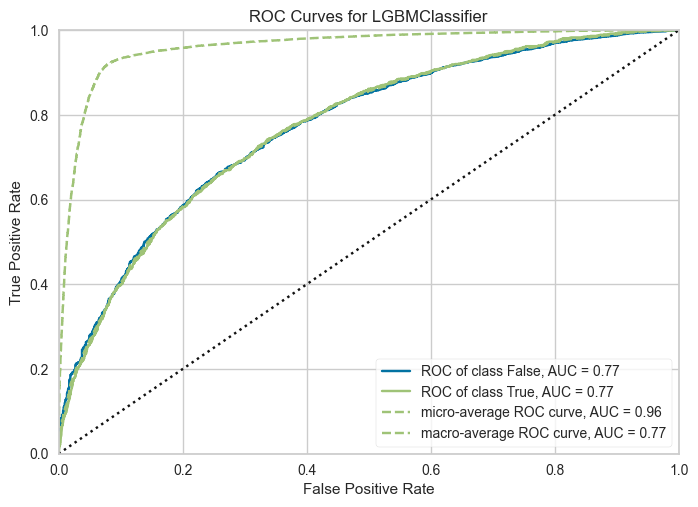

In [123]:
plot_model(tuned_lgbm, plot = 'auc')

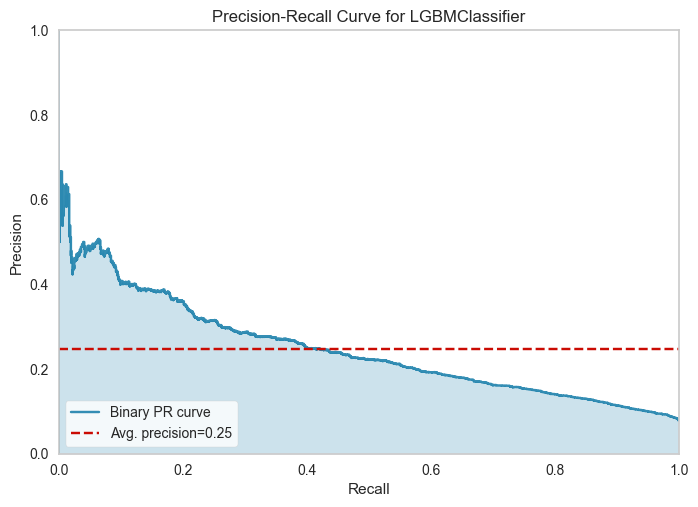

In [124]:
plot_model(tuned_lgbm, plot = 'pr')

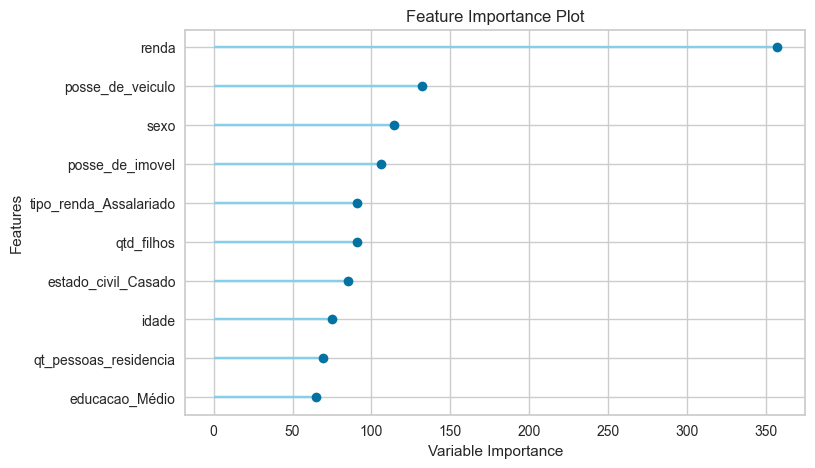

In [125]:
plot_model(tuned_lgbm, plot='feature')

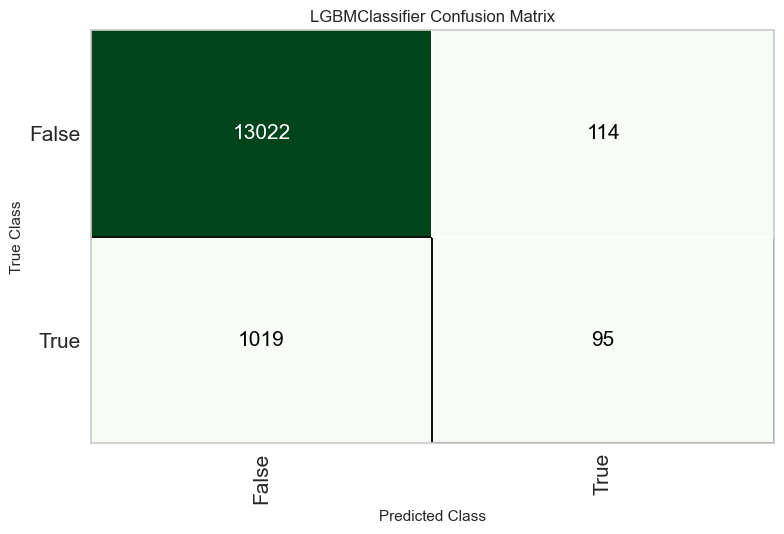

In [126]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

In [127]:
# Avaliando na base out of time

predict_model(tuned_lgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9205,0.7711,0.0853,0.4545,0.1436,0.1219,0.1711


In [128]:
# Preparando para salvar o modelo
final_lgbm = finalize_model(tuned_lgbm)

In [129]:
# Verificando os parâmetros
print(final_lgbm)

Pipeline(memory=FastMemory(location=/var/folders/lh/hj21t5rn6fg9r84_yy383zfm0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['qtd_filhos', 'idade',
                                             'tempo_emprego',
                                             'qt_pessoas_residencia', 'renda'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              s...
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', le

In [130]:
# Salvando localmente.
save_model(final_lgbm,'model_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/lh/hj21t5rn6fg9r84_yy383zfm0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               s...
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_ty